# Cmas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Cmas'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30515246,C57BL/6N,f,mutant,het (Cmas),23.1,94.73,67.14,1.96,0.70
1,30515248,C57BL/6N,f,mutant,het (Cmas),22.3,91.97,61.46,1.95,0.74
2,30515249,C57BL/6N,f,mutant,het (Cmas),21.8,89.34,58.68,2.74,1.21
3,30515252,C57BL/6N,f,mutant,het (Cmas),23.2,90.02,59.15,2.73,1.10
4,30515262,C57BL/6N,f,mutant,het (Cmas),22.4,81.45,48.59,2.96,1.52
5,30515263,C57BL/6N,f,mutant,het (Cmas),20.3,87.19,55.70,2.84,1.38
6,30515266,C57BL/6N,m,mutant,het (Cmas),29.2,84.92,52.77,3.05,1.46
7,30515267,C57BL/6N,m,control,wt (Cmas),26.2,82.73,49.79,2.78,1.42
8,30515268,C57BL/6N,m,mutant,het (Cmas),28.1,89.63,58.45,2.46,1.09
9,30515269,C57BL/6N,f,control,wt (Cmas),24.0,85.52,53.07,2.68,1.23


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30516135,Acsf3_1vX_9.dcm,2.972093,0.019167,1.217733,0.068333,765.957447,0.019167,0.563026,high,0.563026,high,34.209105,3.493955,89.786476,59.027778,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,-0.247907,3.096047,-0.432267,1.433866,7.966476,9.277778
1,30516135,Acsf3_1vX_9.dcm,3.467442,0.097500,1.155814,0.167500,615.384615,0.097500,0.563026,high,0.563026,high,49.736682,3.039645,93.888526,66.666667,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.247442,3.343721,-0.494186,1.402907,12.068526,16.916667
2,30516135,Acsf3_1vX_9.dcm,3.611919,0.195000,1.135174,0.249167,576.000000,0.195000,0.563026,high,0.563026,high,54.865433,2.896510,94.720702,68.571429,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.391919,3.415959,-0.514826,1.392587,12.900702,18.821429
3,30516135,Acsf3_1vX_9.dcm,3.859593,0.873333,1.898837,0.913333,571.428571,0.873333,0.975178,high,0.975178,high,64.294893,11.148341,82.660612,50.802139,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.639593,3.539797,0.248837,1.774419,0.840612,1.052139
4,30516135,Acsf3_1vX_9.dcm,3.611919,0.978333,1.836919,1.022500,521.739130,0.978333,0.975178,high,0.975178,high,54.865433,10.240417,81.335393,49.142857,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.391919,3.415959,0.186919,1.743459,-0.484607,-0.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,30515554,Uggt2_2vX_16.dcm,3.240407,4.335833,1.981395,4.377500,605.042017,4.335833,0.659593,high,0.659593,high,42.226616,12.427936,70.568477,38.853503,C57BL/6N,m,control,wt (Uggt2),24.0,81.04,48.56,3.37,1.70,-0.129593,3.305203,0.281395,1.840698,-10.471523,-9.706497
3660,30515554,Uggt2_2vX_16.dcm,3.137209,4.435000,1.609884,4.475000,672.897196,4.435000,0.659593,high,0.986212,high,39.033508,7.283662,81.339976,48.684211,C57BL/6N,m,control,wt (Uggt2),24.0,81.04,48.56,3.37,1.70,-0.232791,3.253605,-0.090116,1.654942,0.299976,0.124211
3661,30515554,Uggt2_2vX_16.dcm,3.013372,4.524167,1.651163,4.568333,631.578947,4.524167,0.986212,high,0.986212,high,35.382494,7.778360,78.016361,45.205479,C57BL/6N,m,control,wt (Uggt2),24.0,81.04,48.56,3.37,1.70,-0.356628,3.191686,-0.048837,1.675581,-3.023639,-3.354521
3662,30515554,Uggt2_2vX_16.dcm,3.364244,4.619167,1.816279,4.655000,765.957447,4.619167,0.986212,high,0.991443,high,46.240040,9.947557,78.487136,46.012270,C57BL/6N,m,control,wt (Uggt2),24.0,81.04,48.56,3.37,1.70,-0.005756,3.367122,0.116279,1.758140,-2.552864,-2.547730


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.72 &  0.29 &       1.05 &  0.36 &   89.36 &  11.42 &   61.27 &  12.44 \\\\\n  & mutant &       2.61 &  0.25 &       1.01 &  0.25 &   90.72 &   6.89 &   61.50 &   8.26 \\\\\nm & control &       2.79 &  0.38 &       1.17 &  0.37 &   88.35 &   8.87 &   58.64 &   9.89 \\\\\n  & mutant &       2.79 &  0.25 &       1.12 &  0.22 &   89.88 &   4.68 &   59.83 &   6.69 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## Differences between automatic and manual measurements

In [7]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

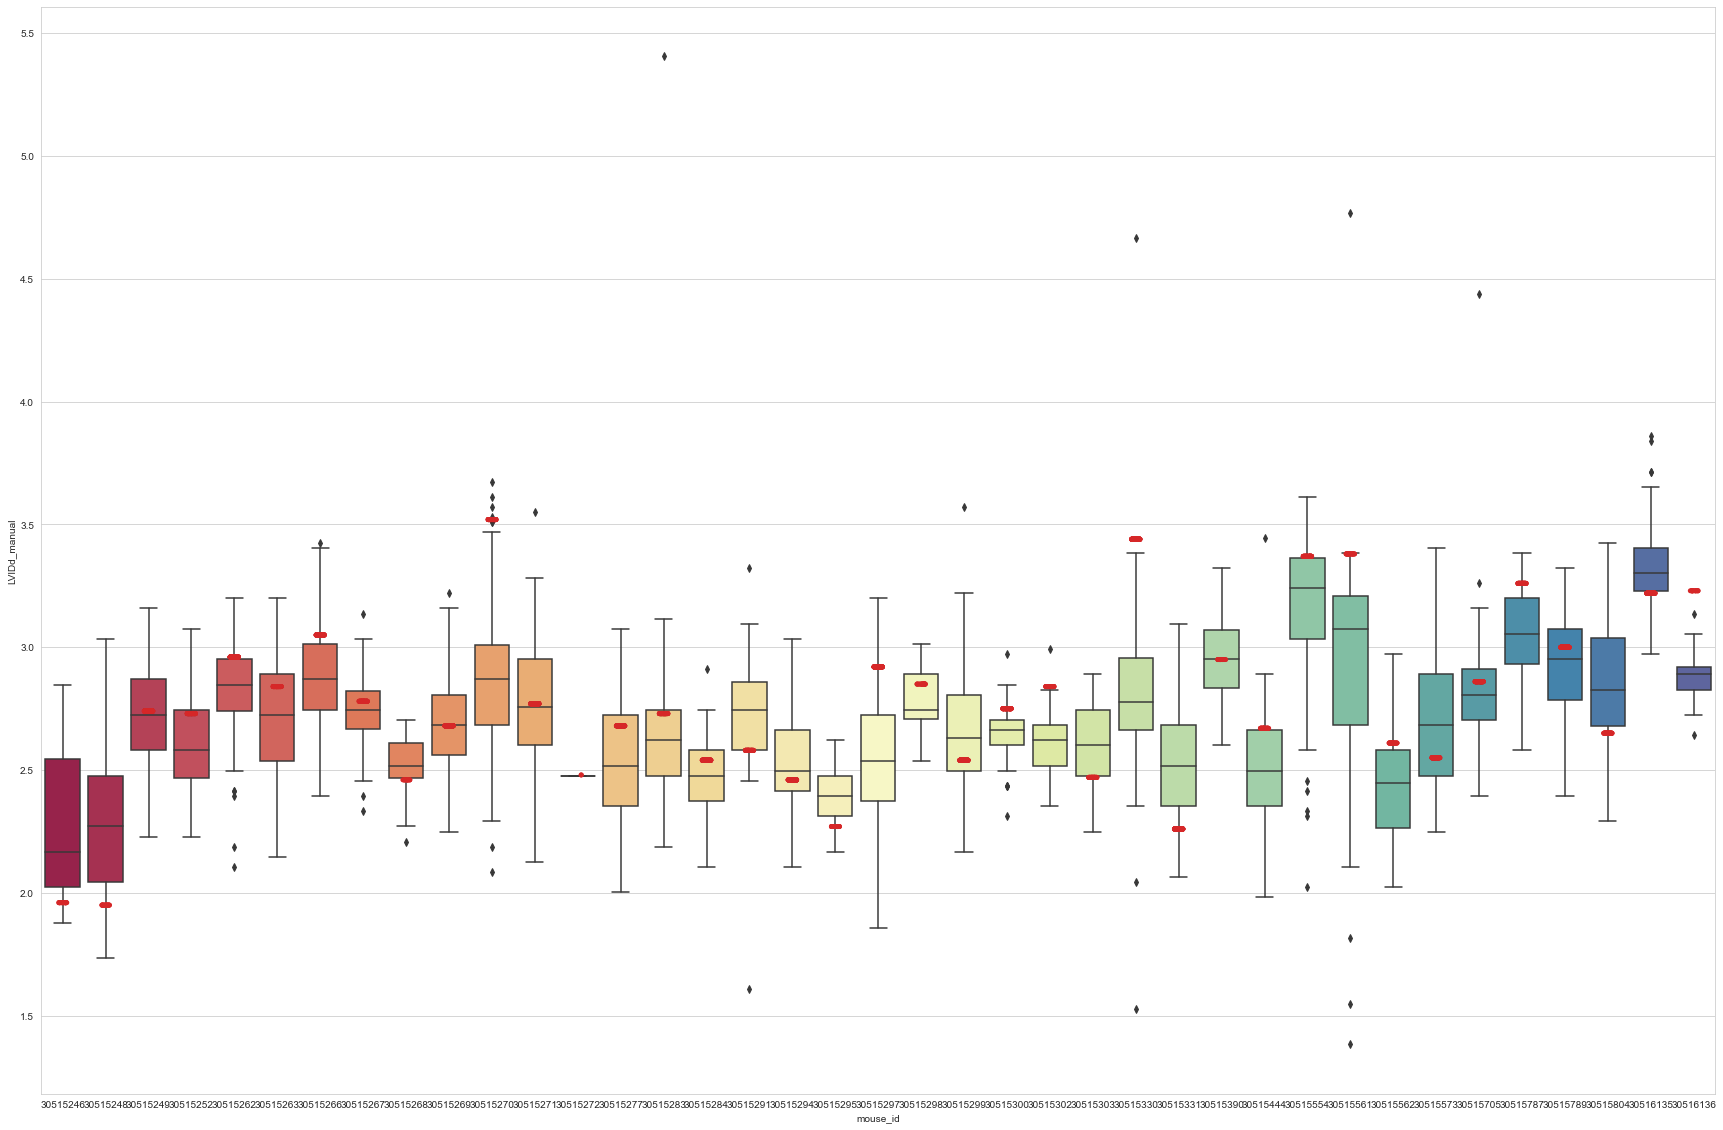

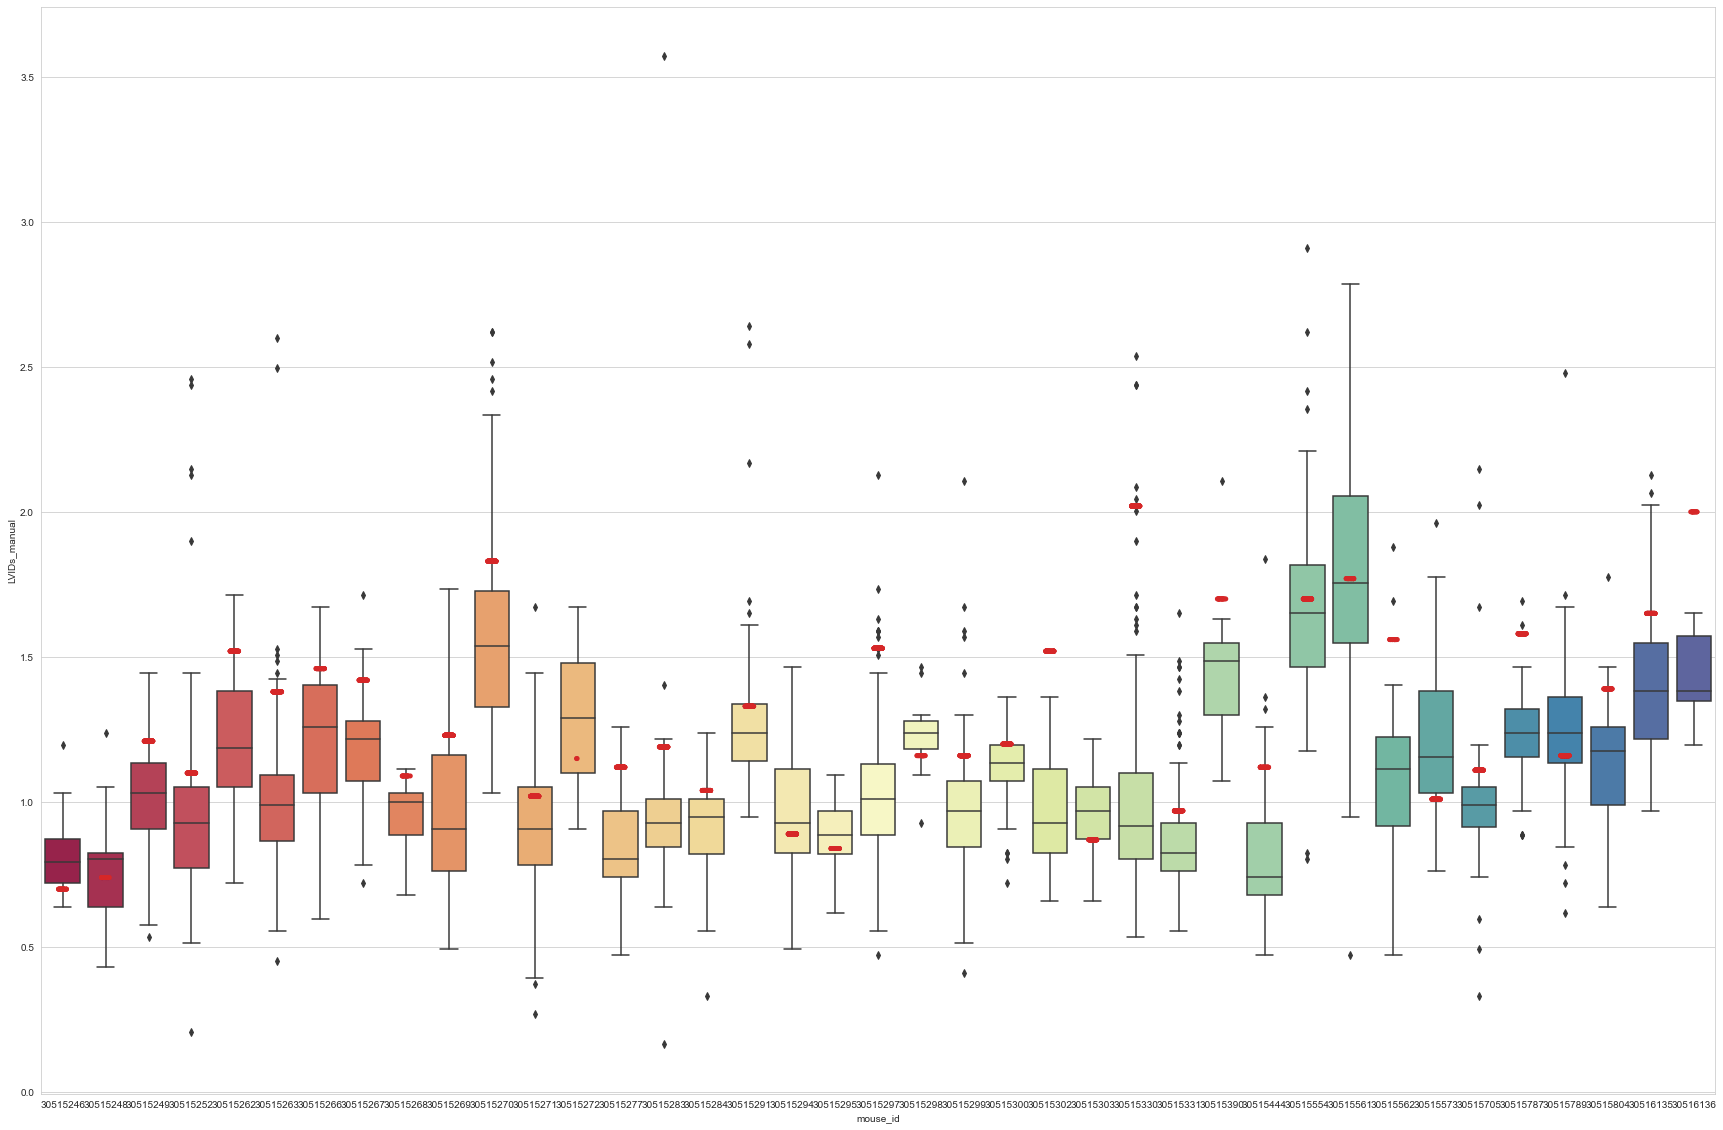

In [8]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79760/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


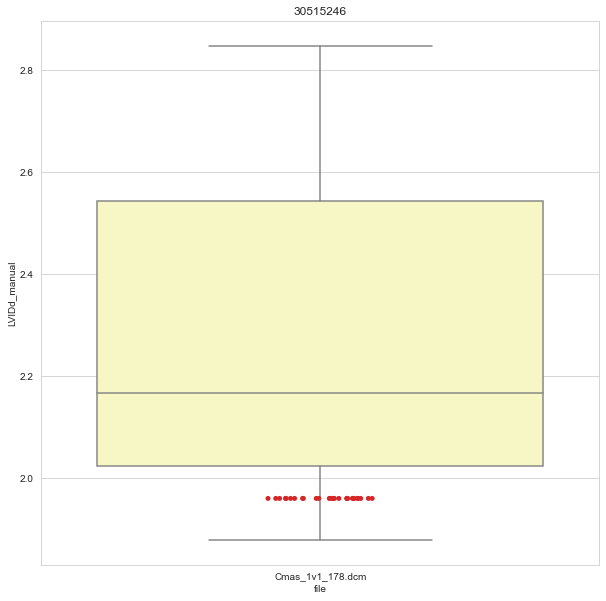

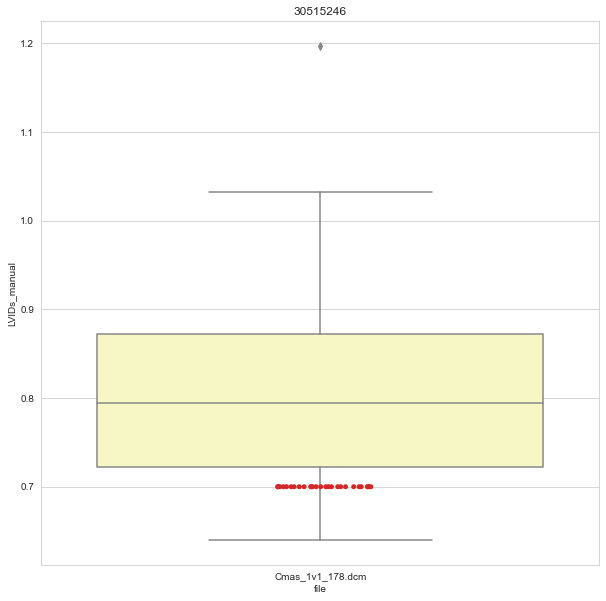

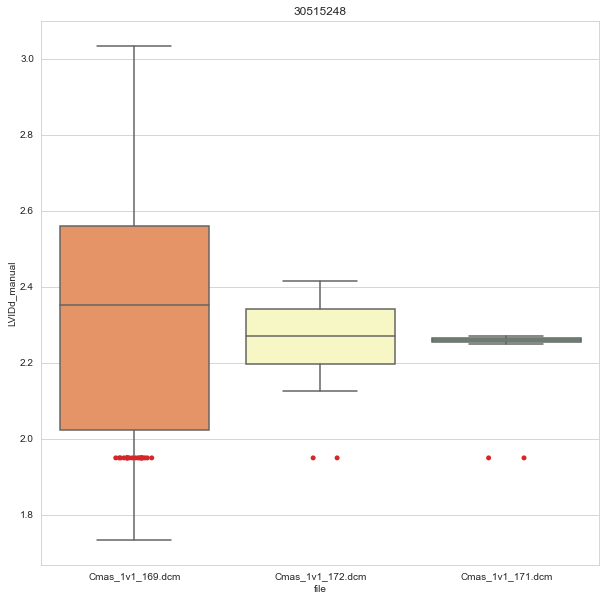

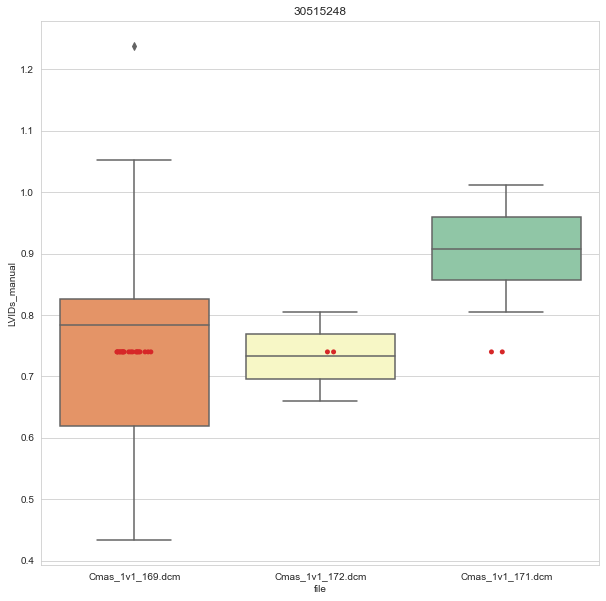

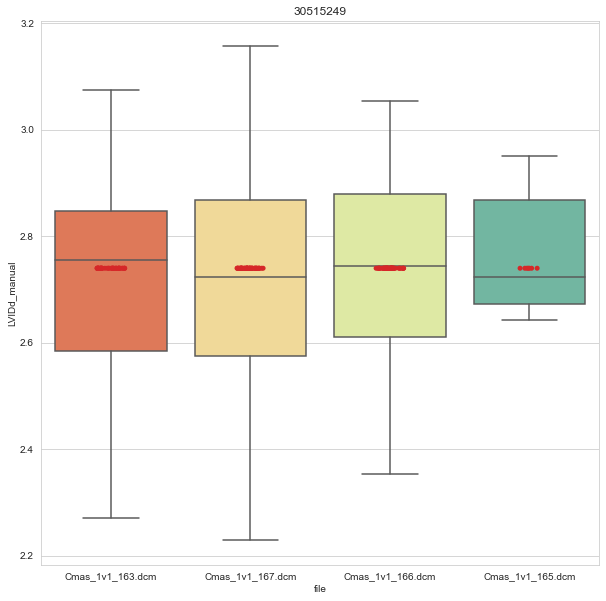

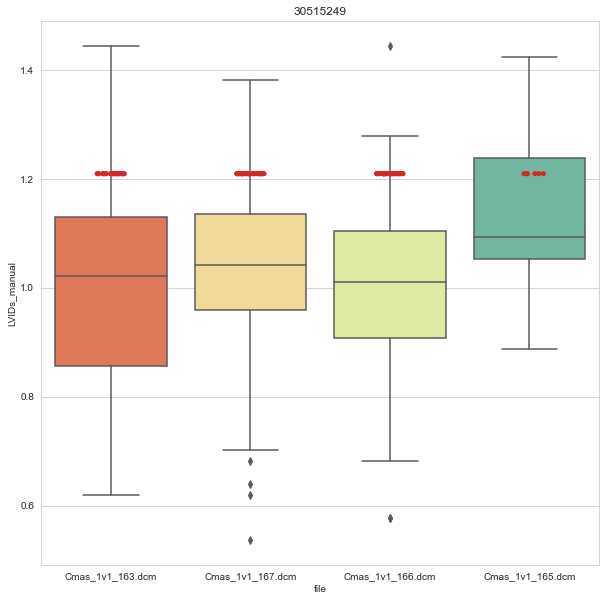

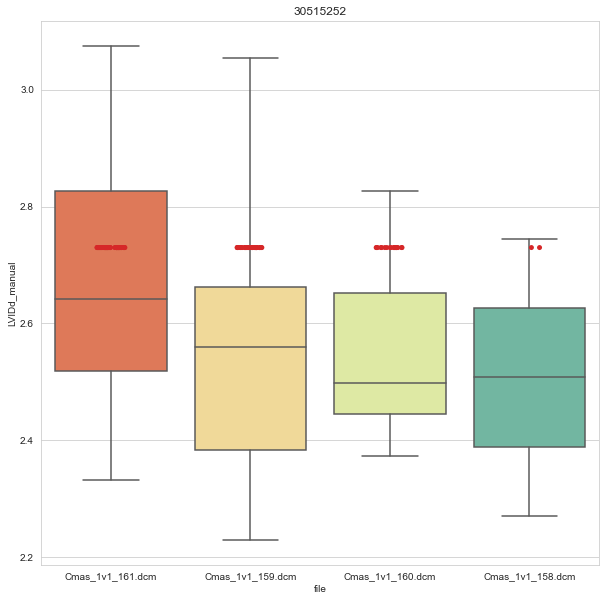

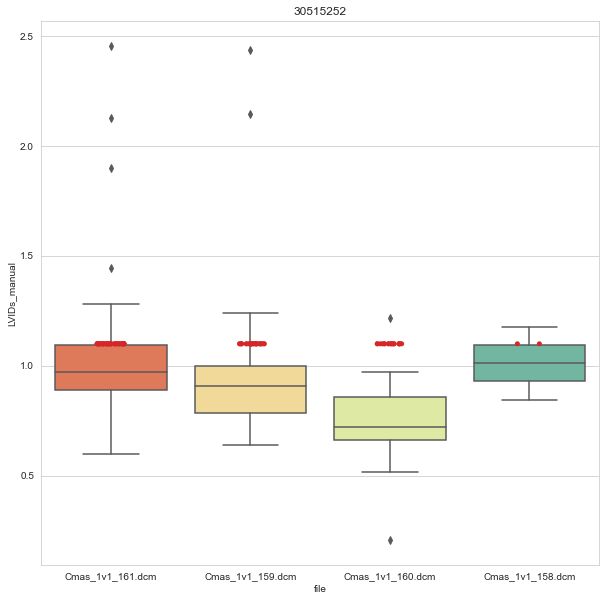

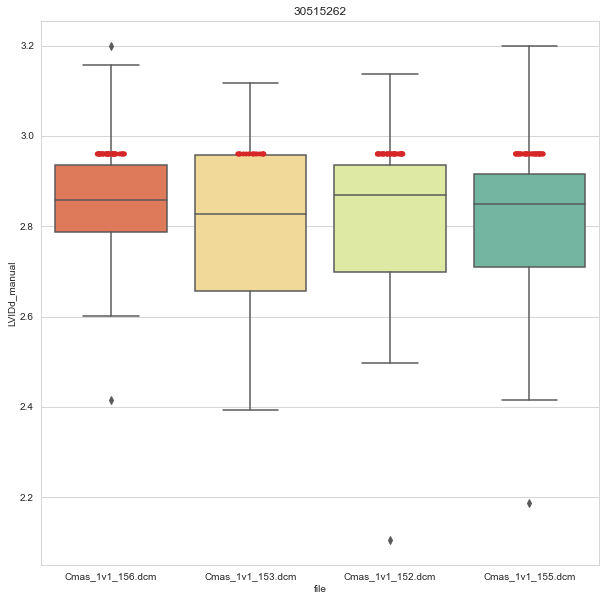

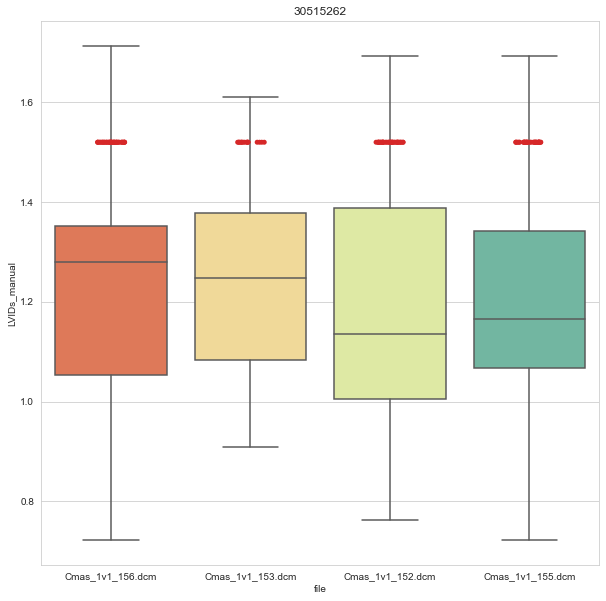

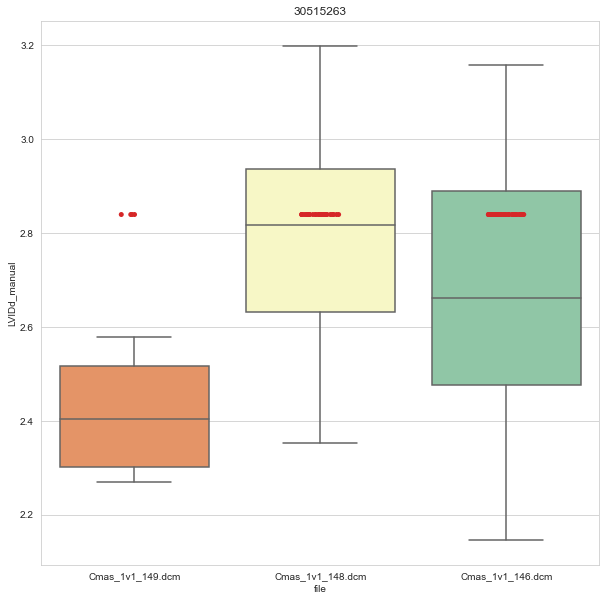

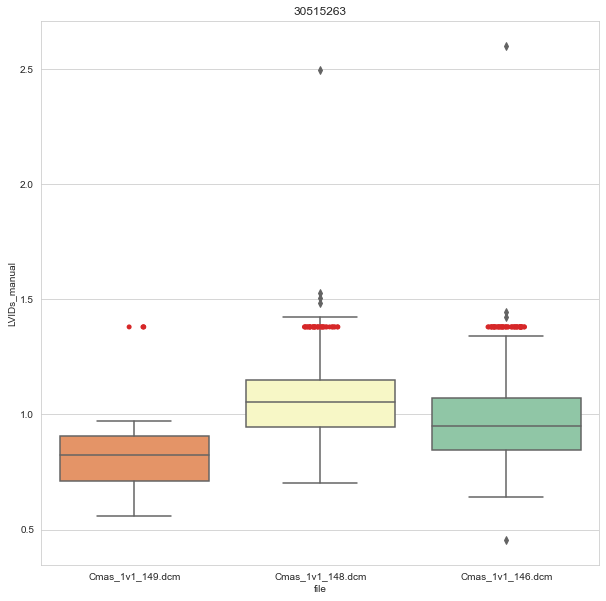

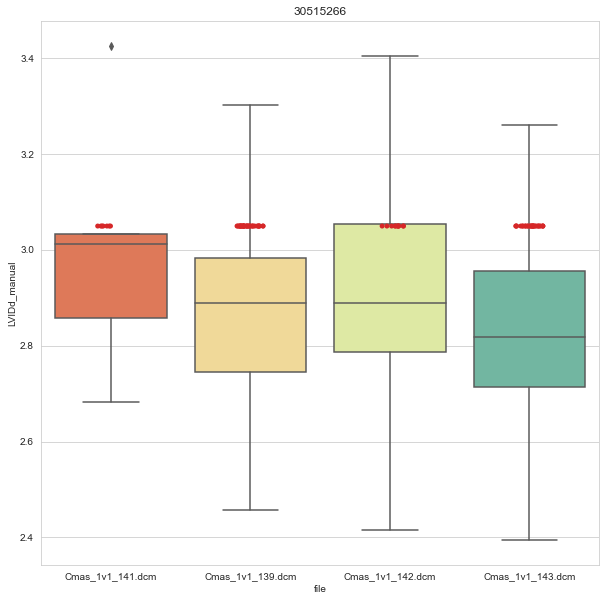

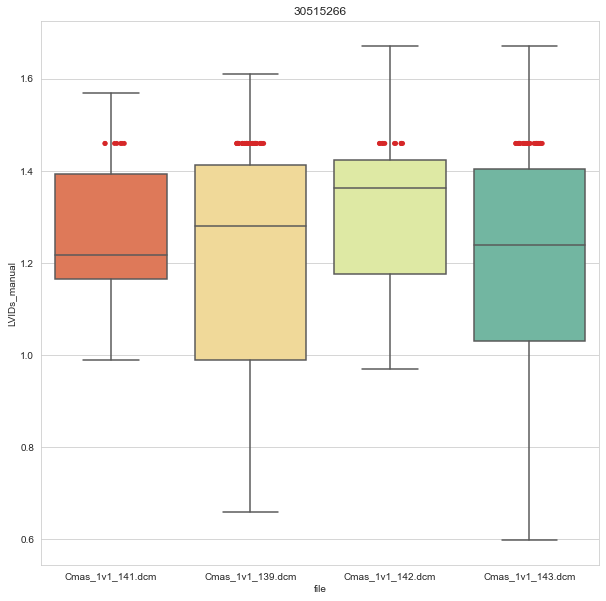

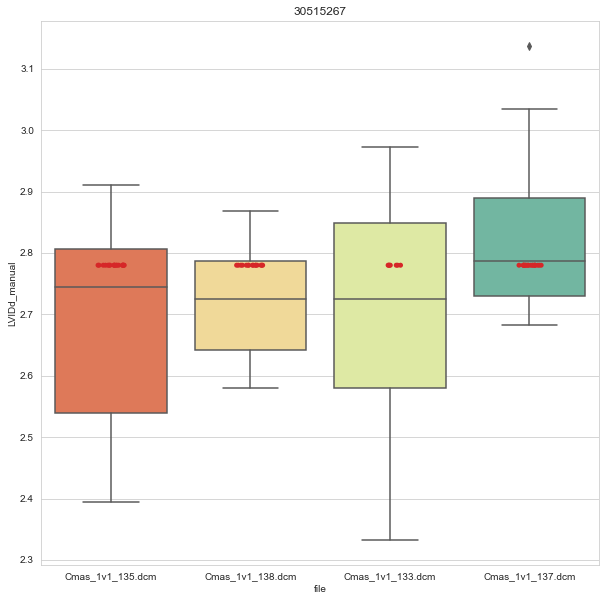

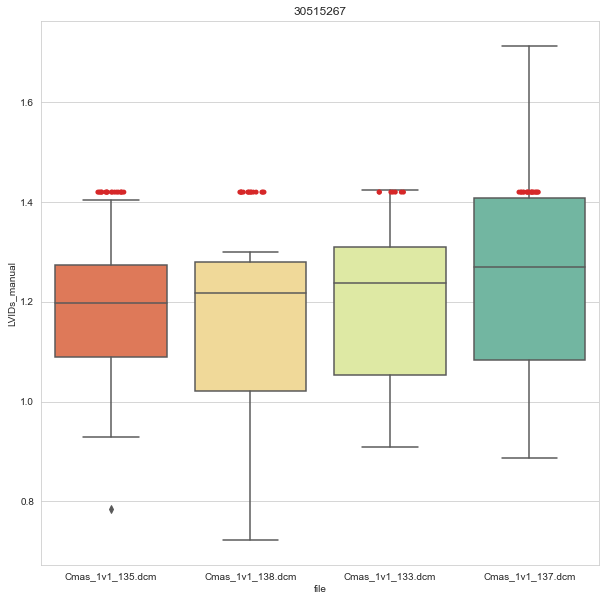

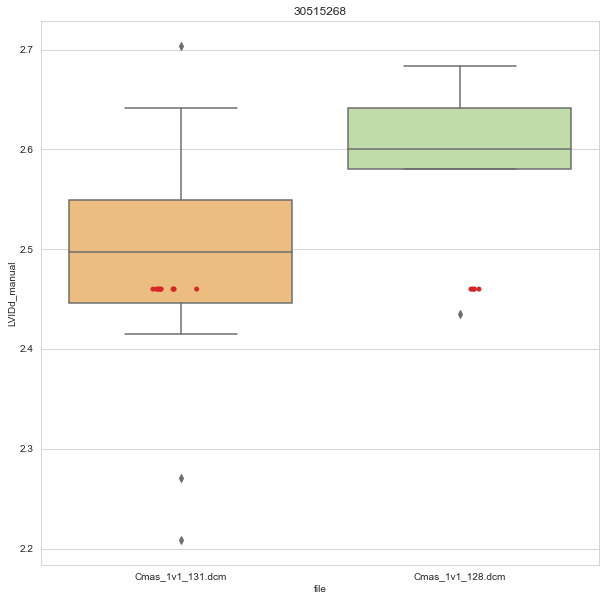

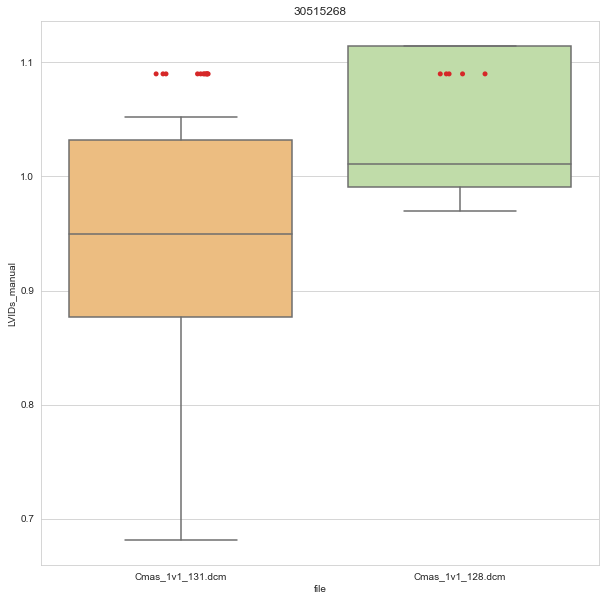

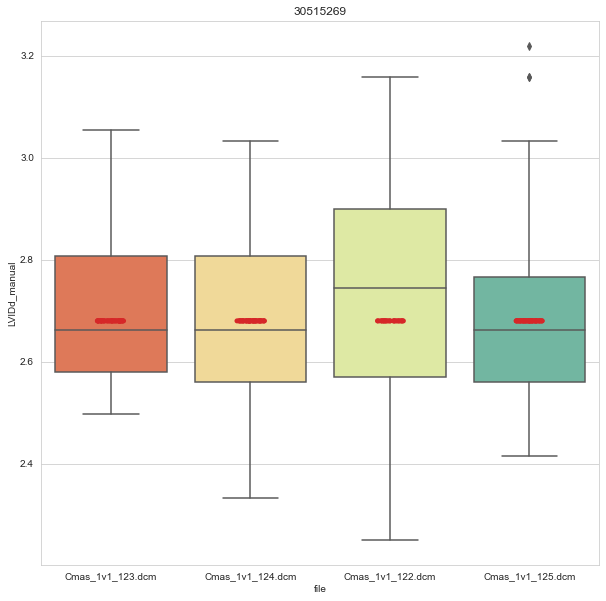

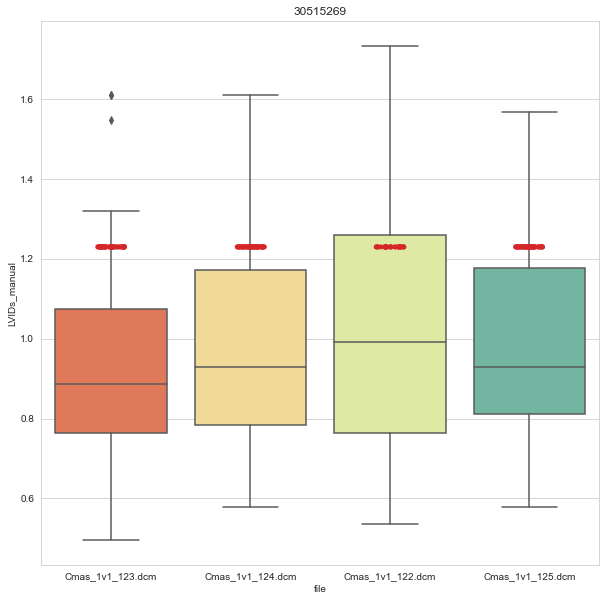

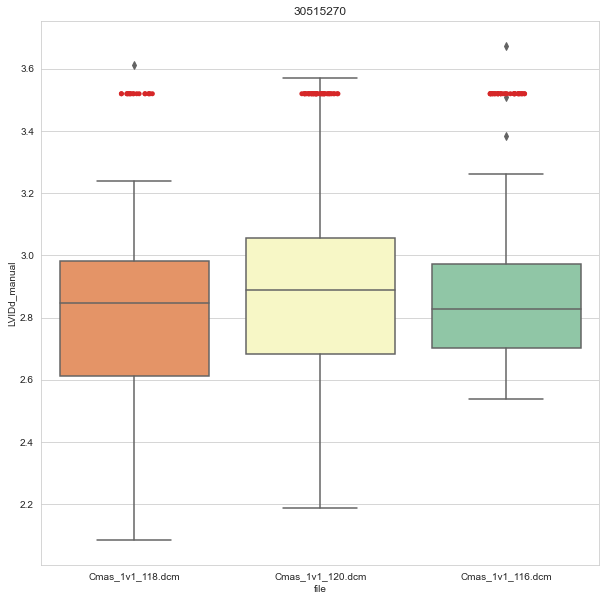

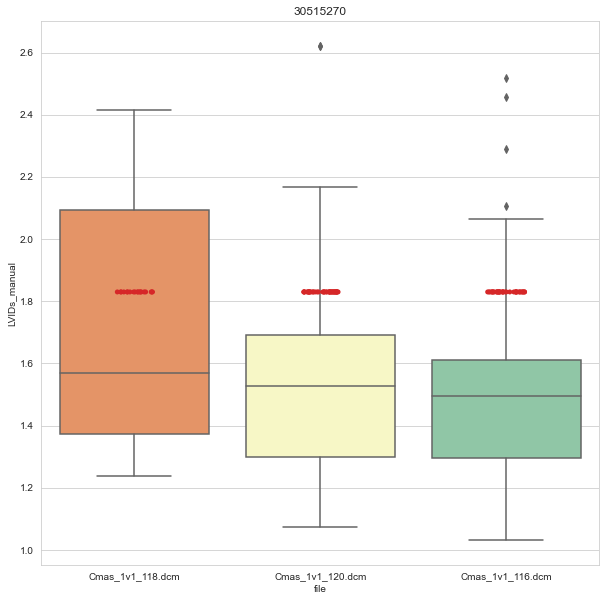

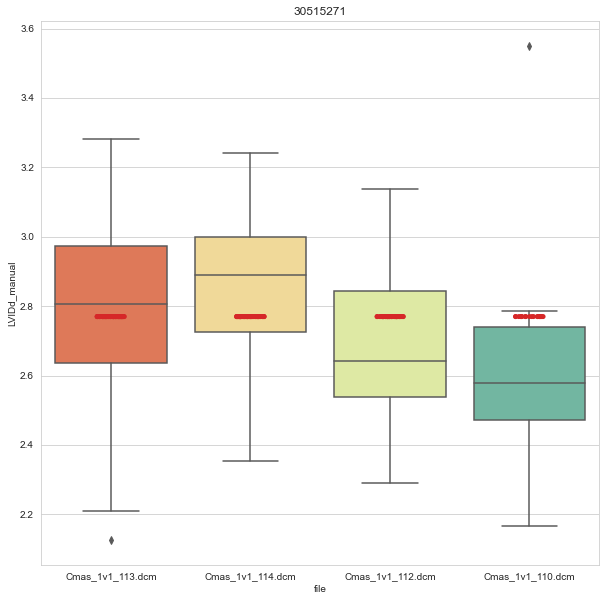

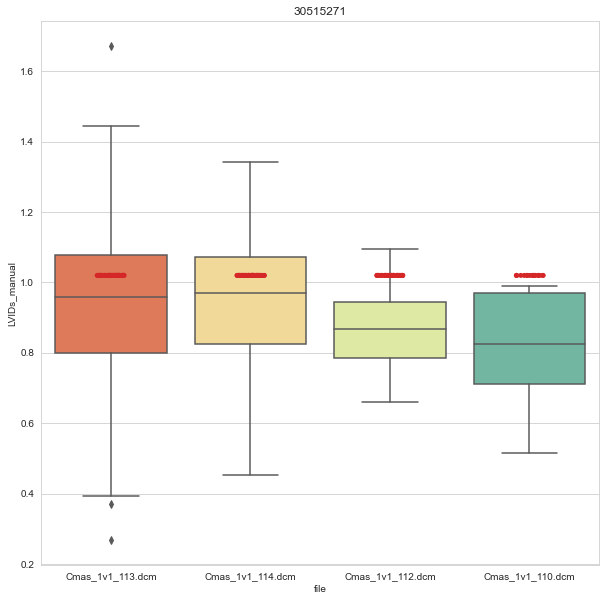

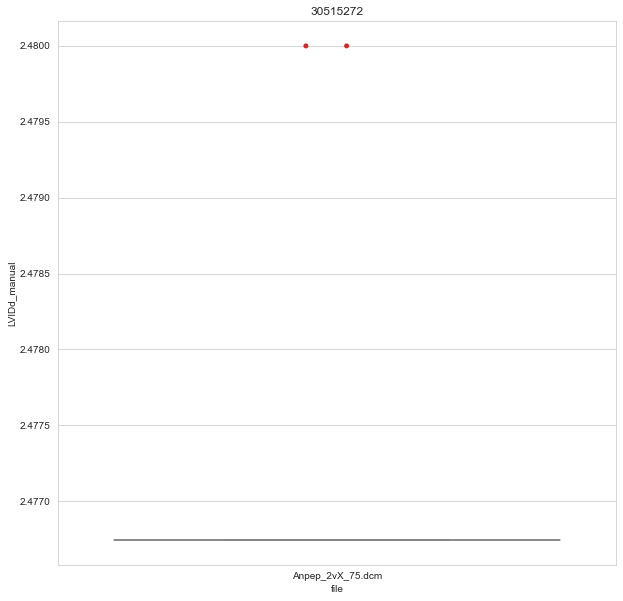

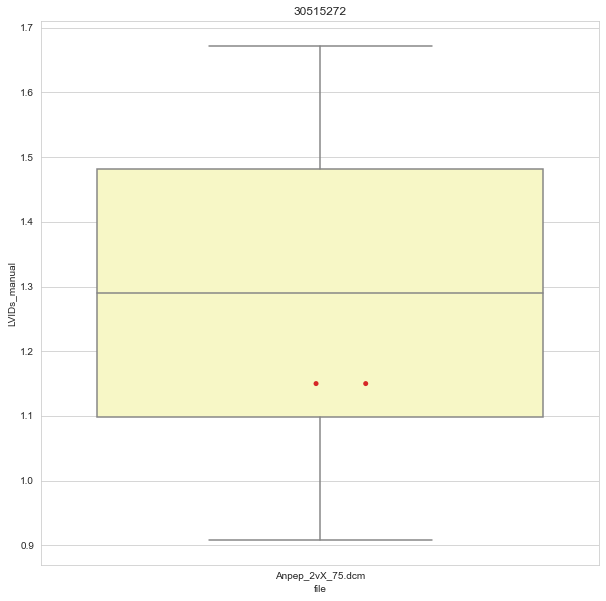

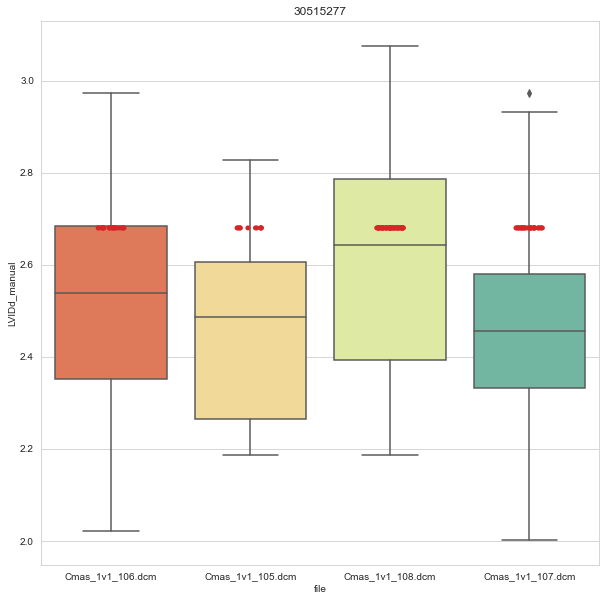

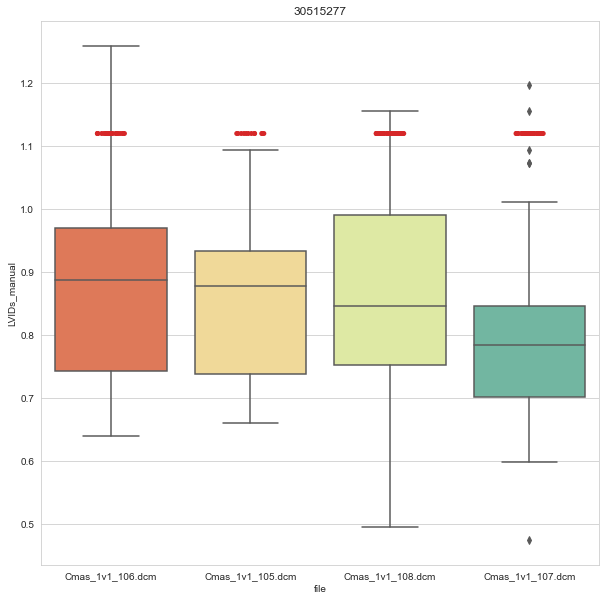

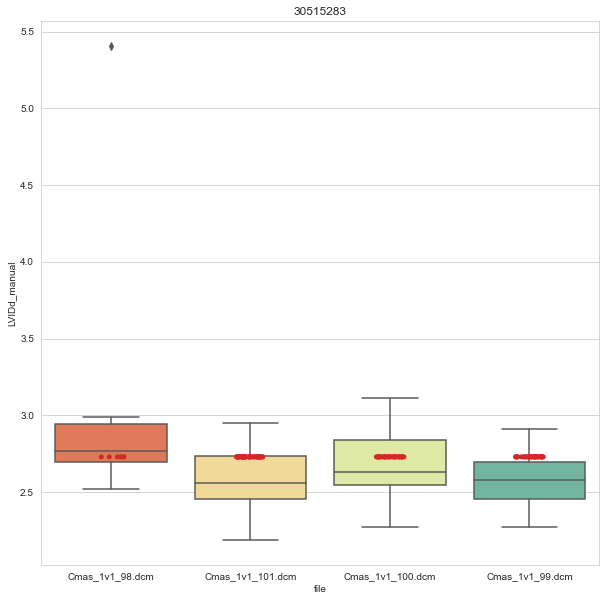

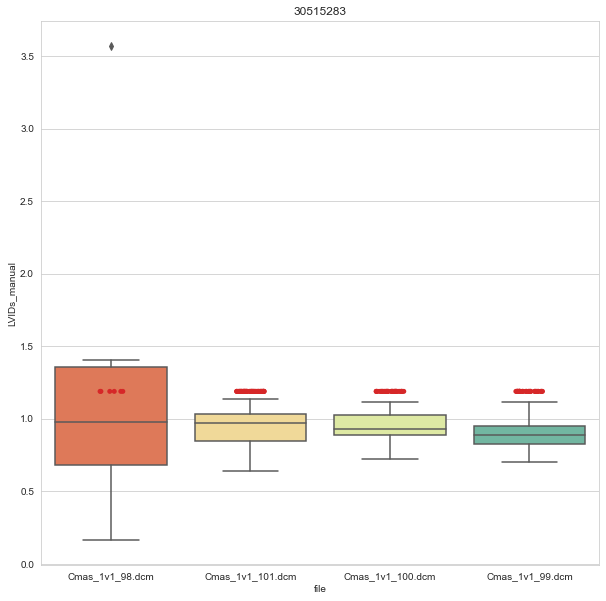

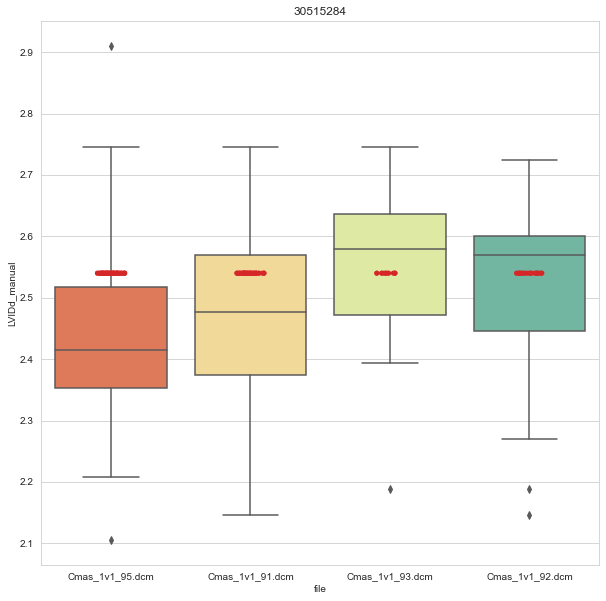

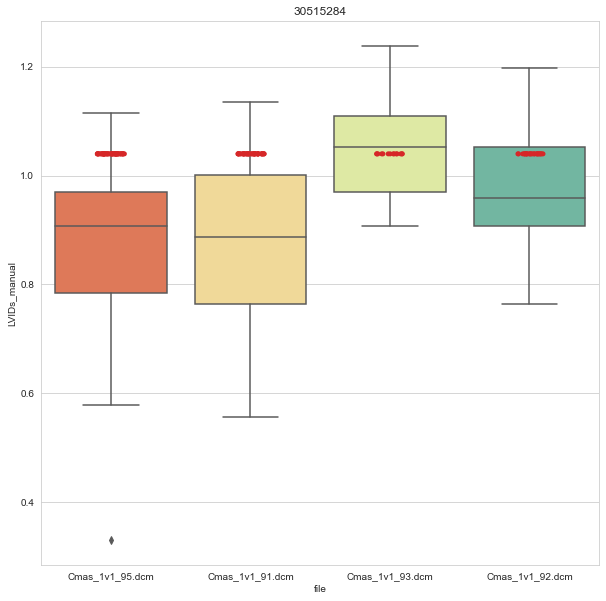

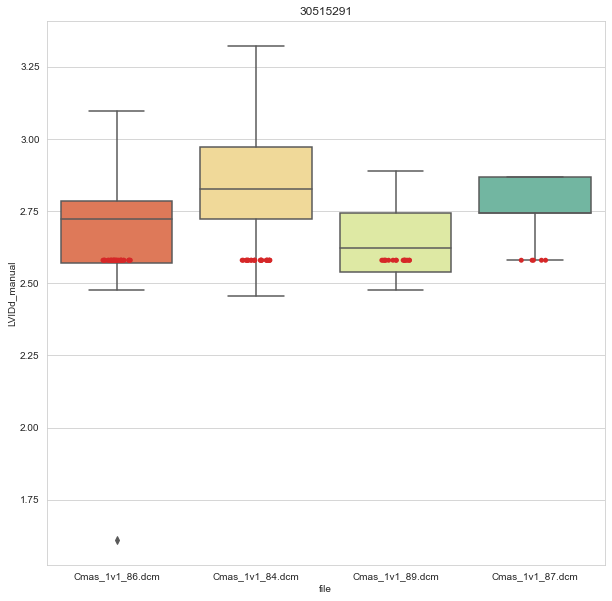

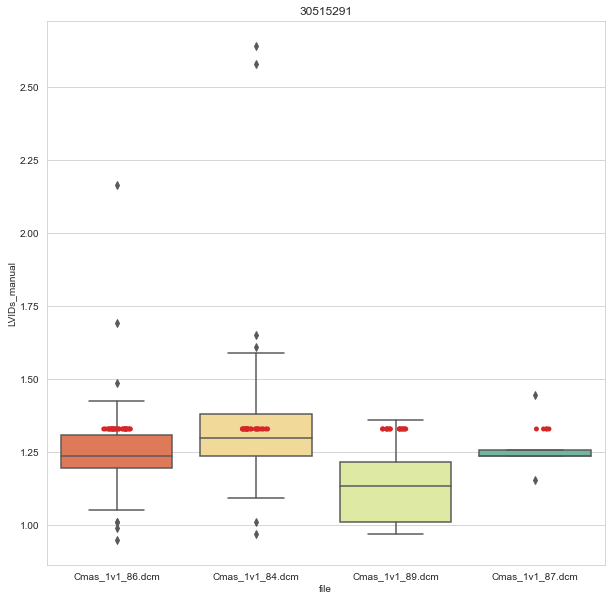

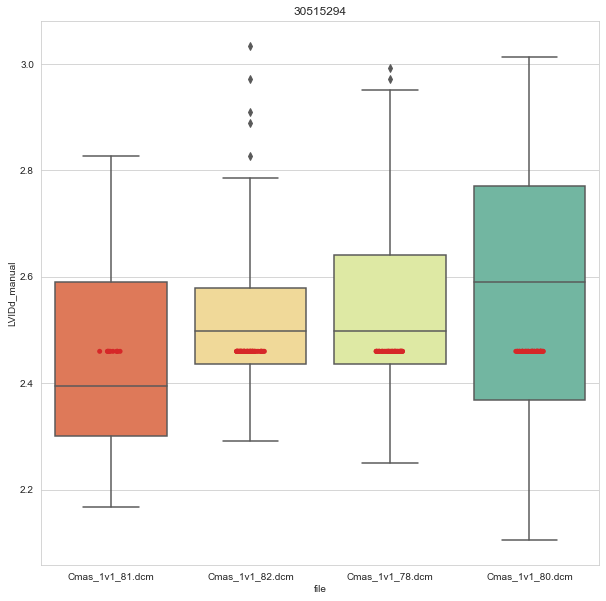

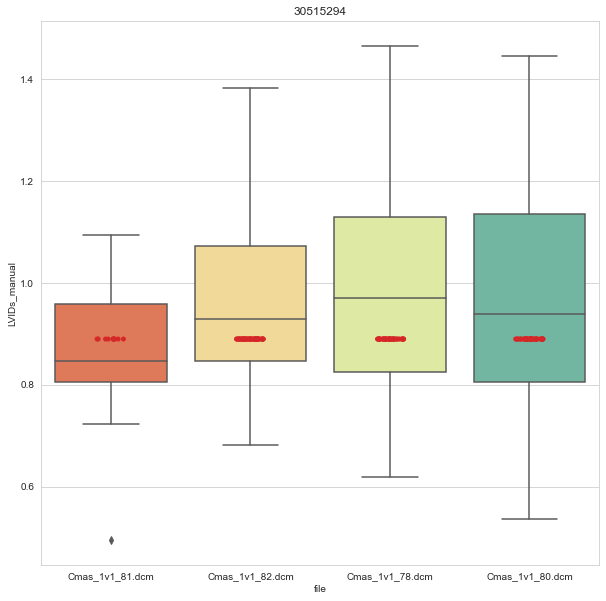

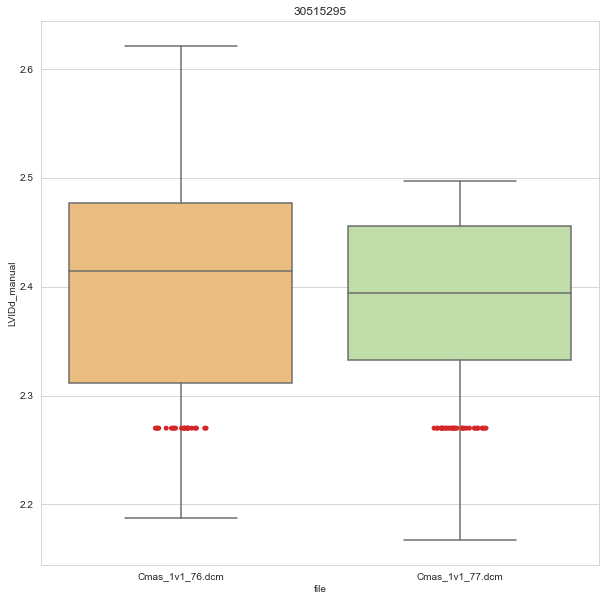

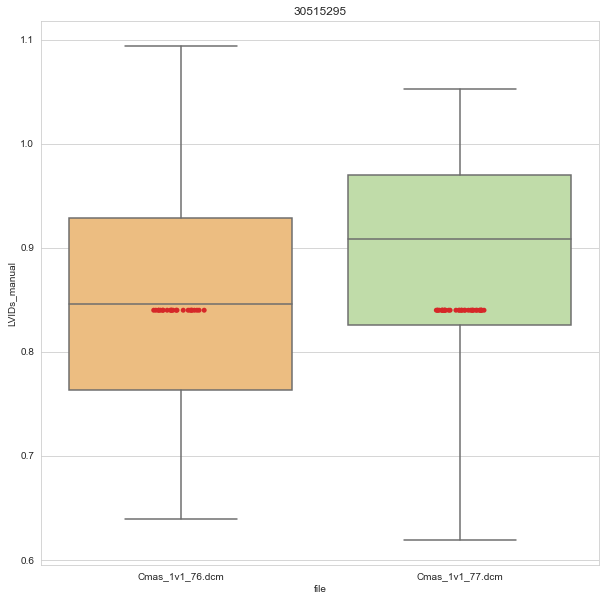

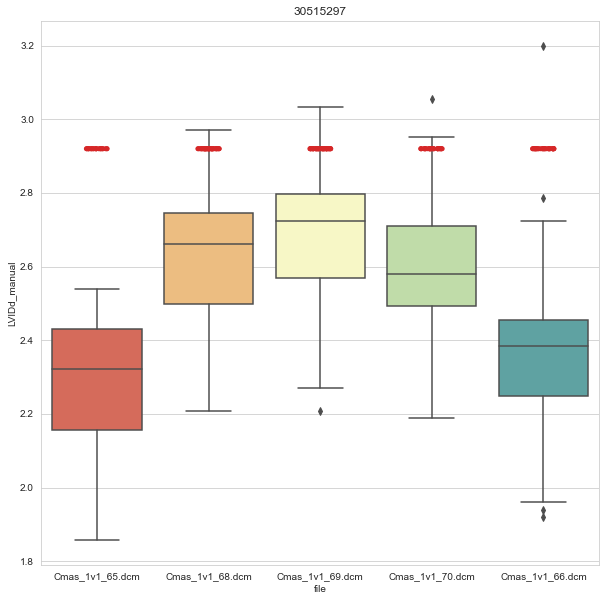

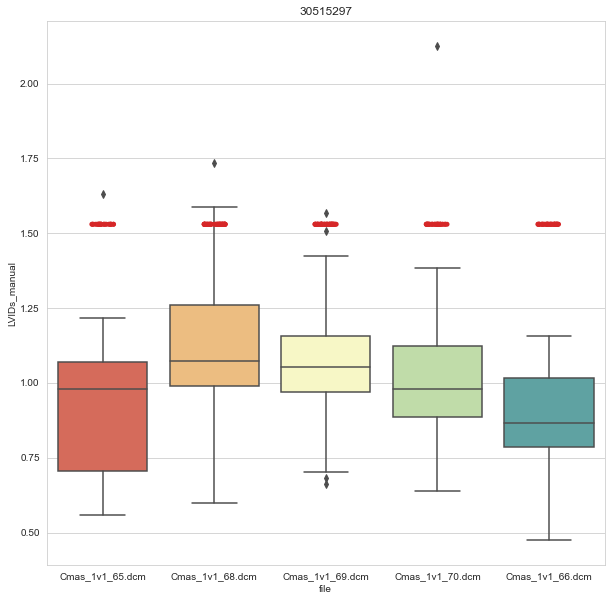

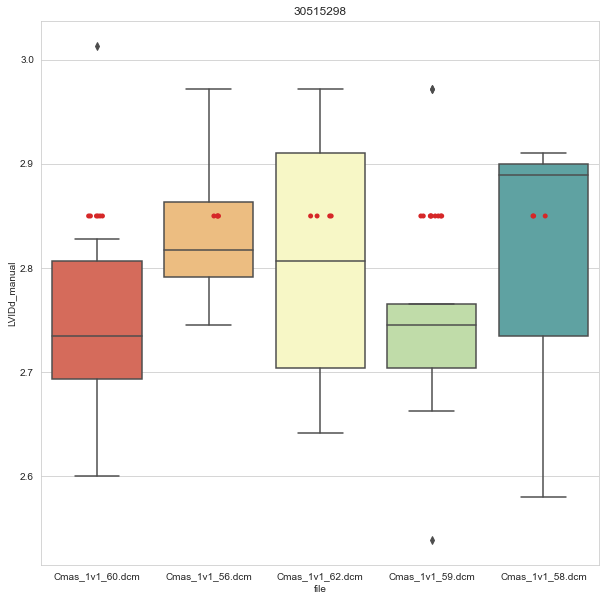

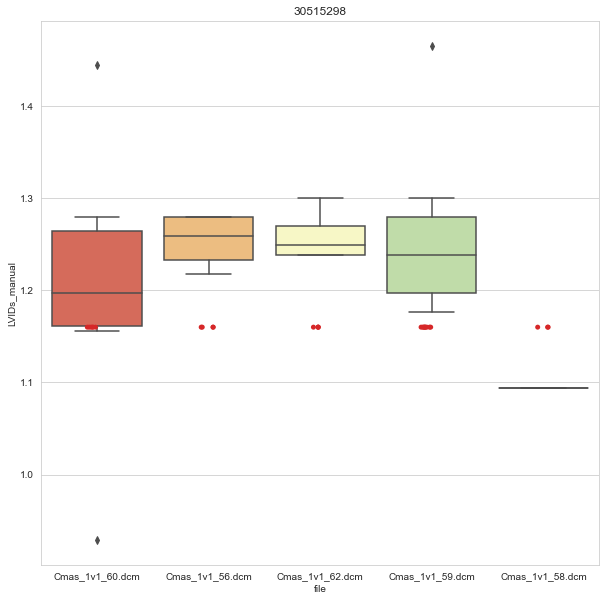

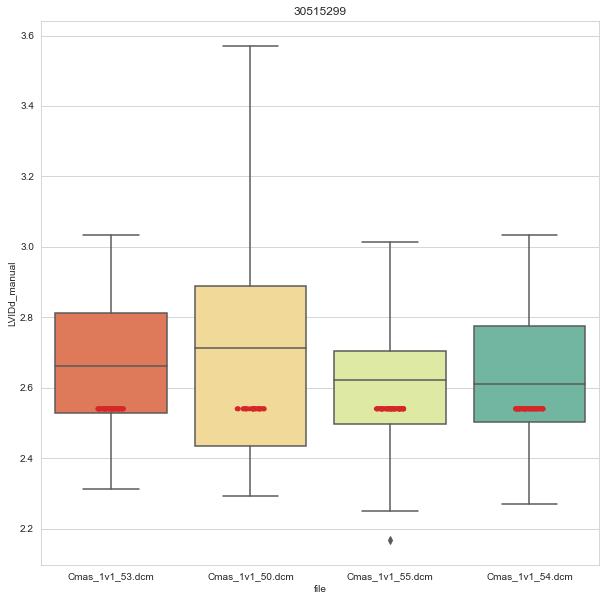

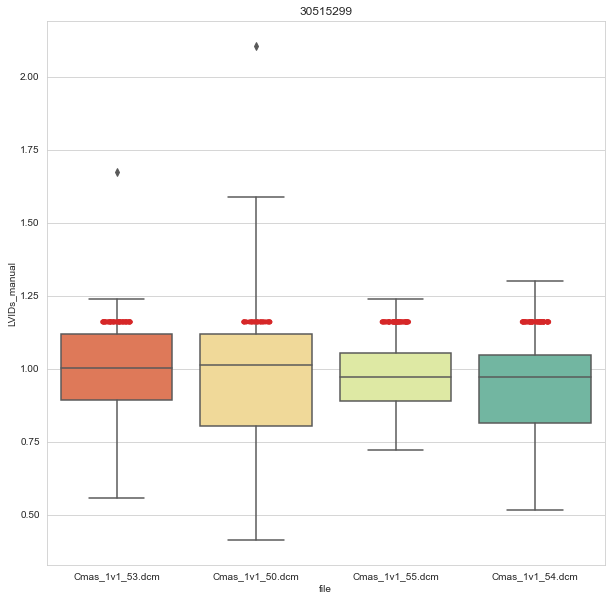

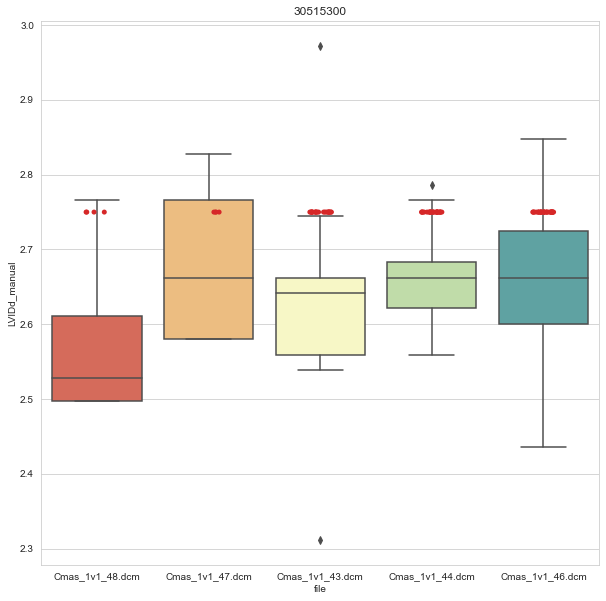

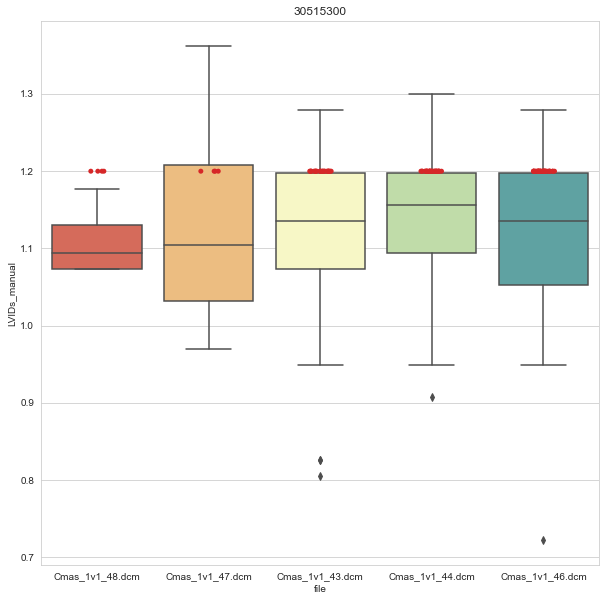

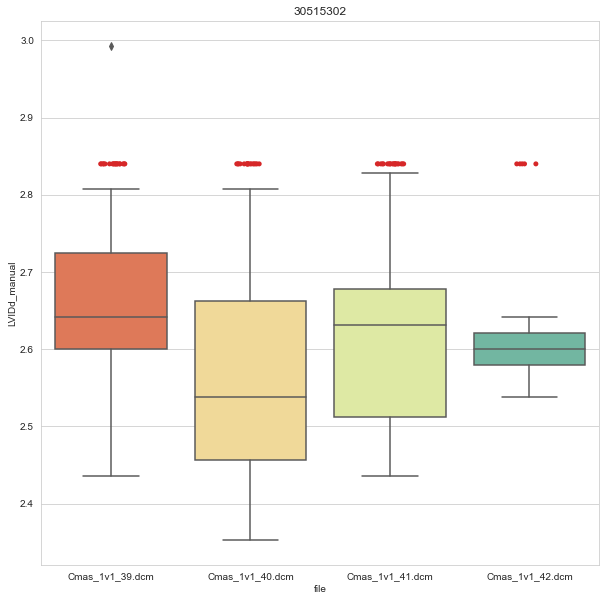

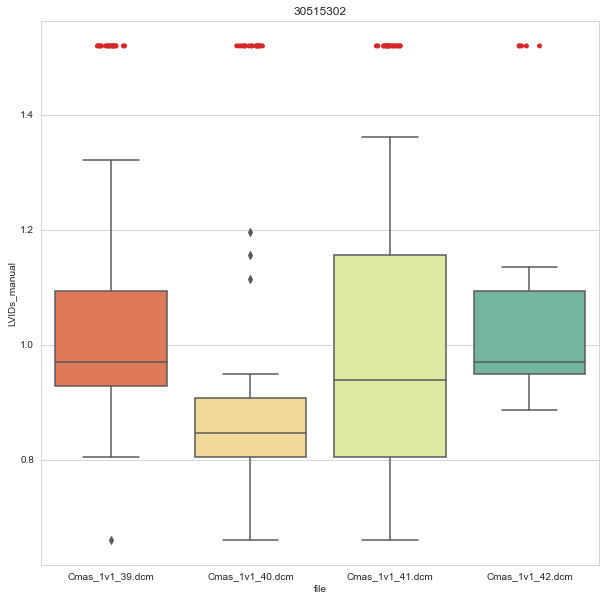

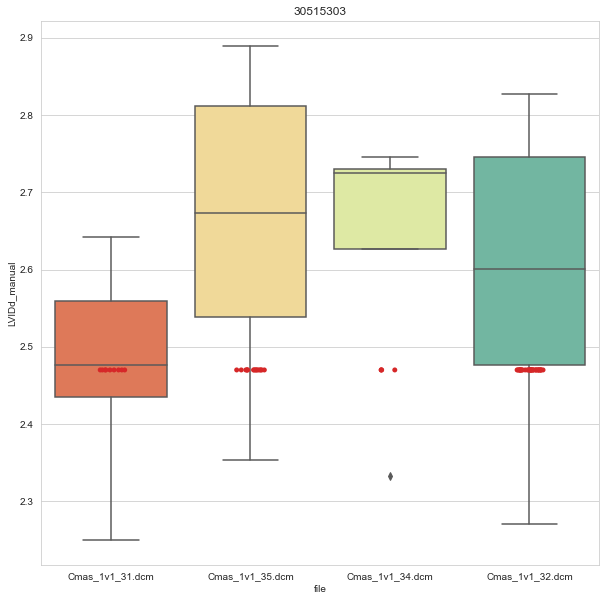

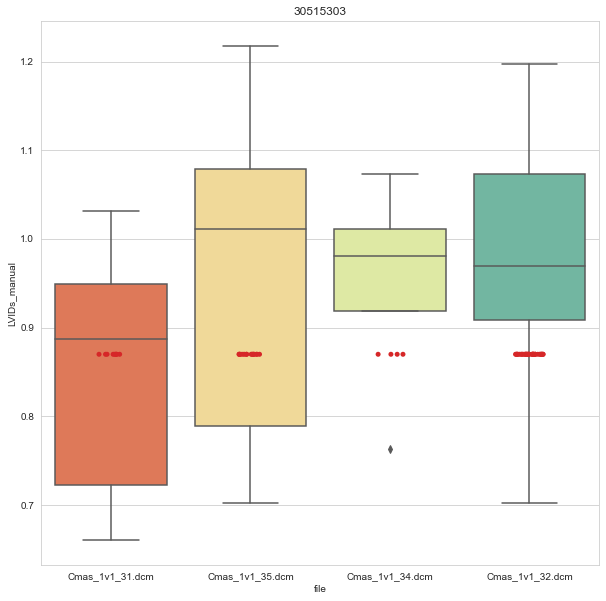

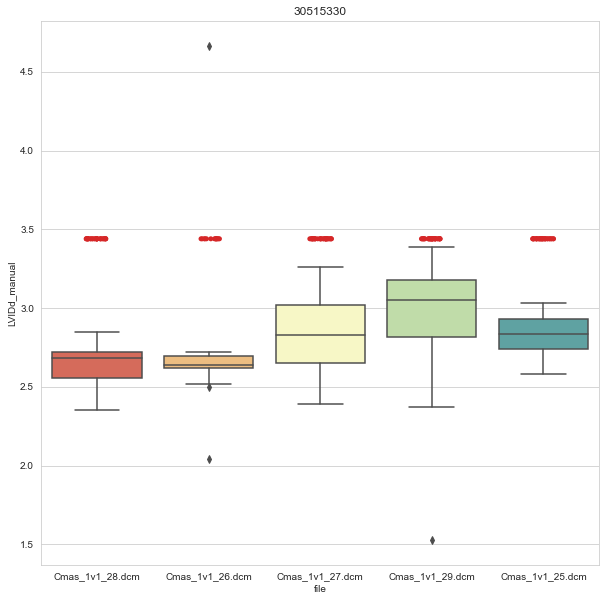

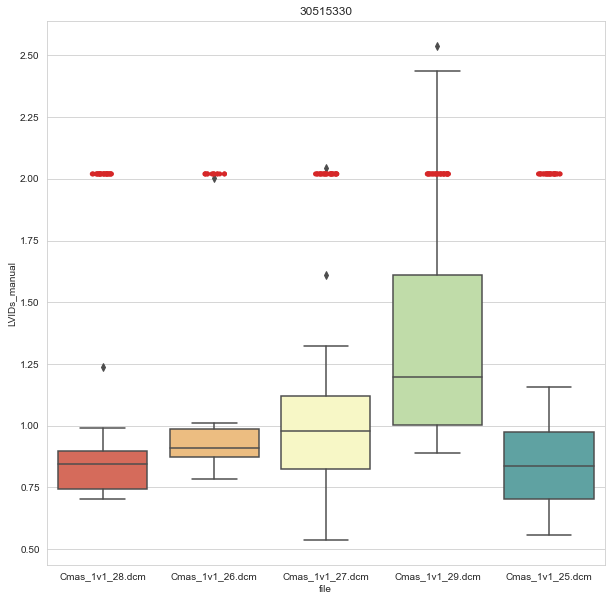

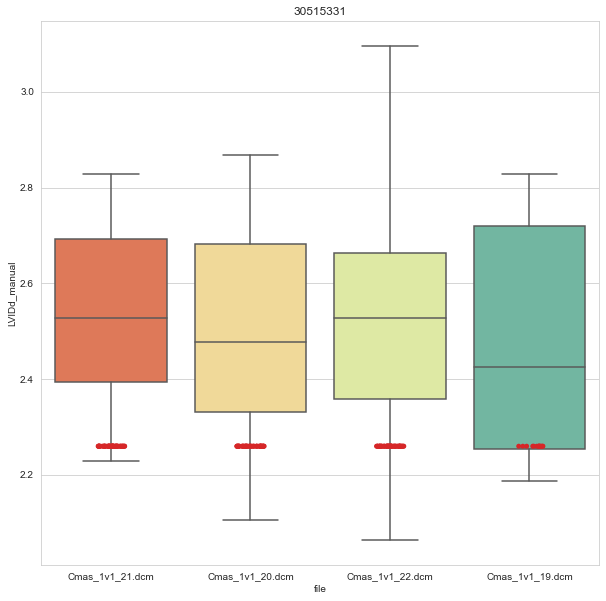

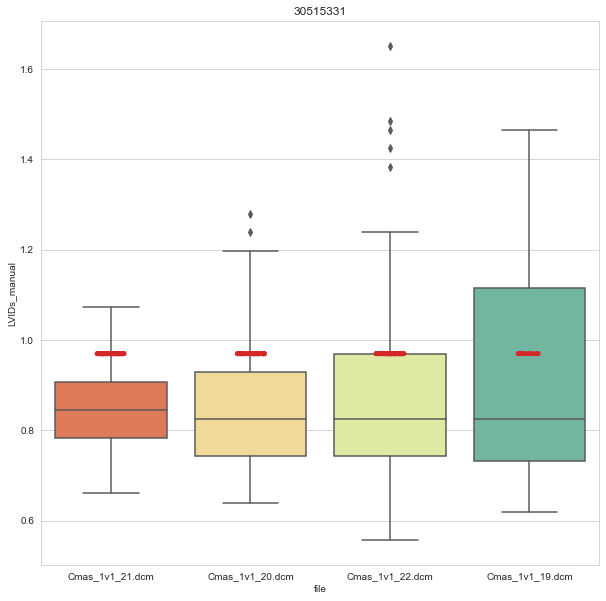

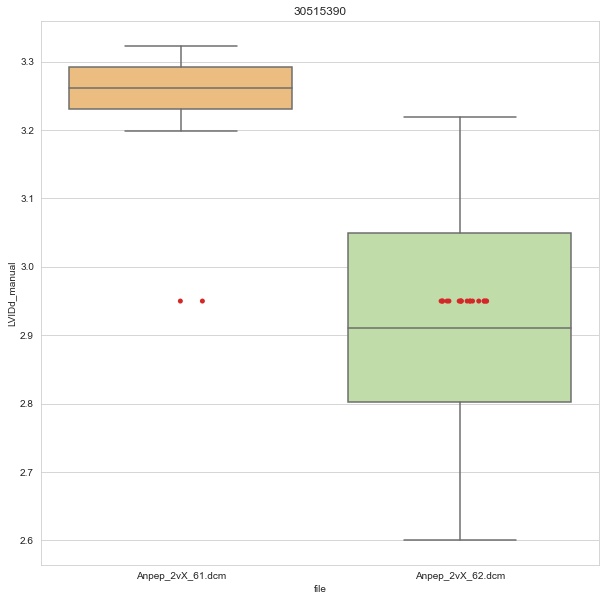

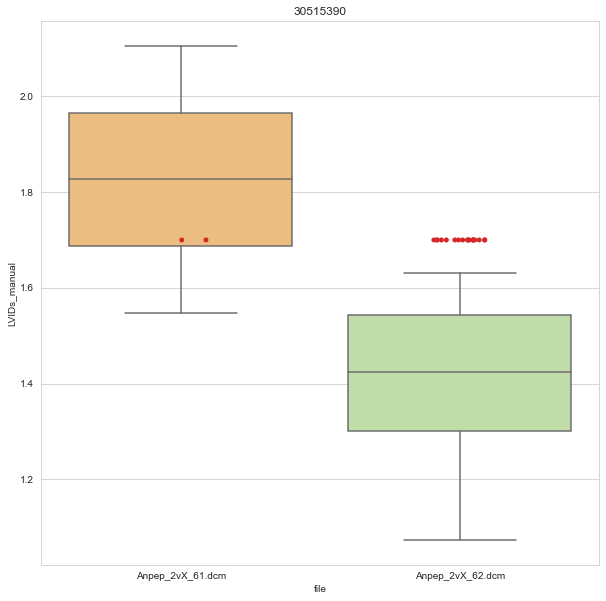

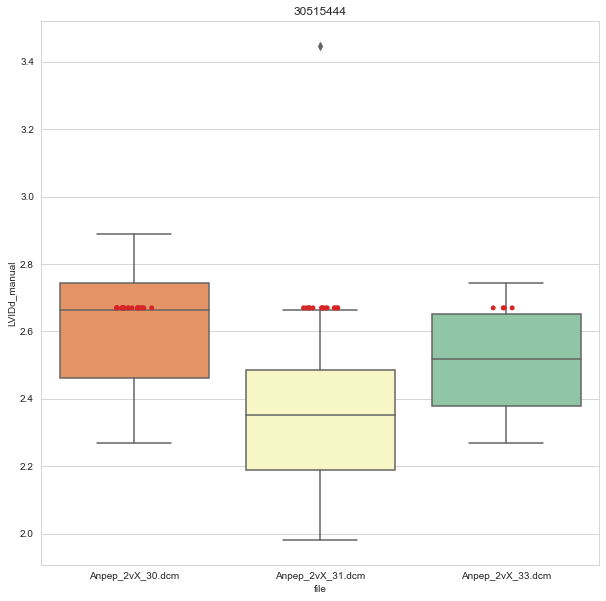

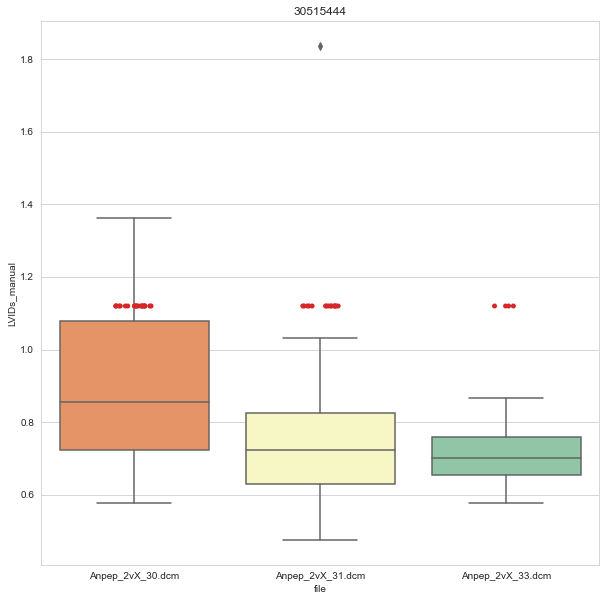

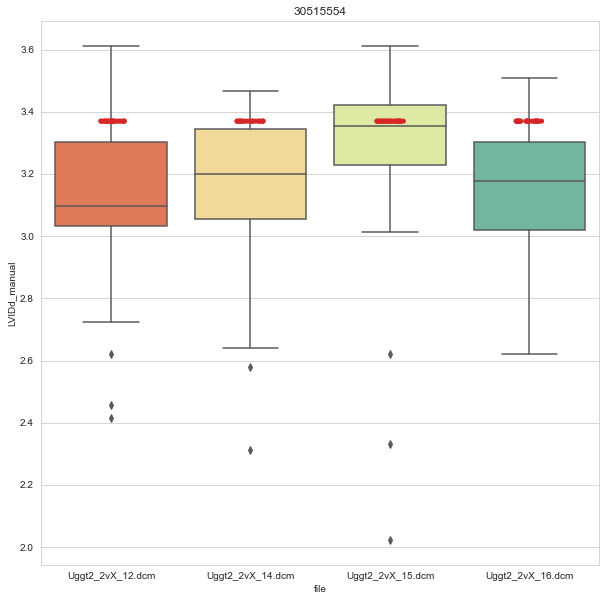

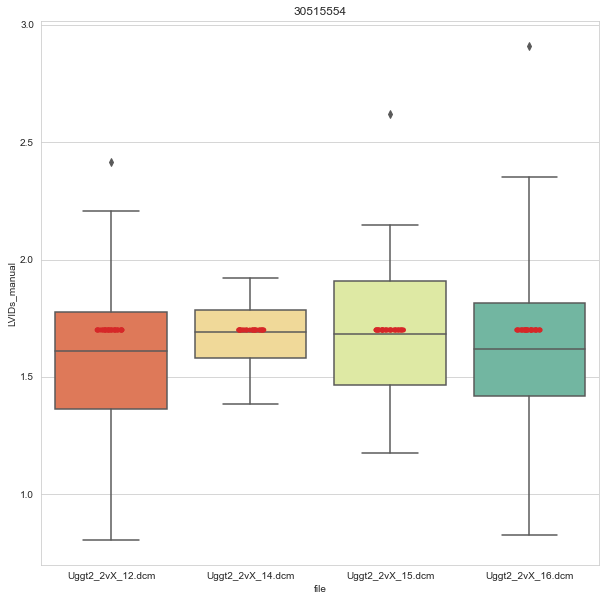

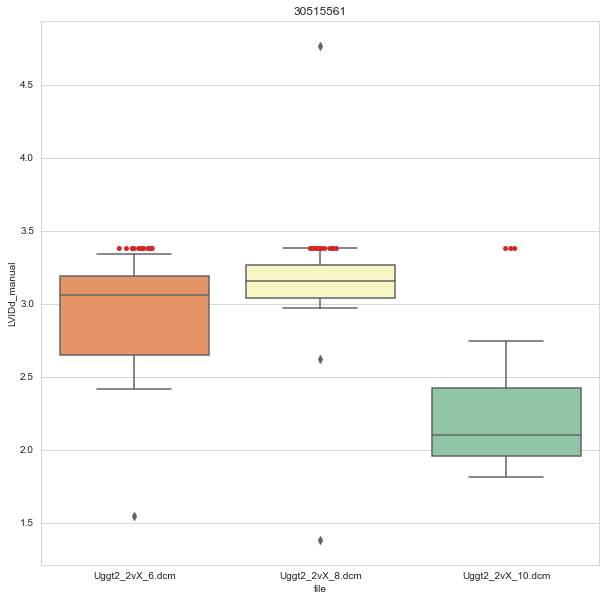

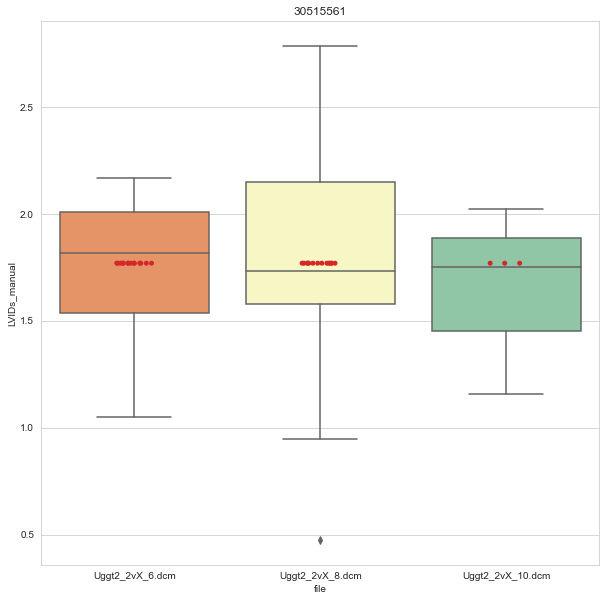

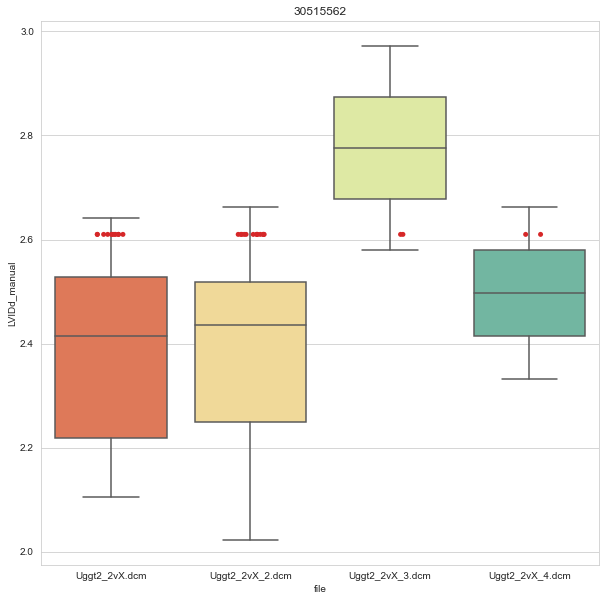

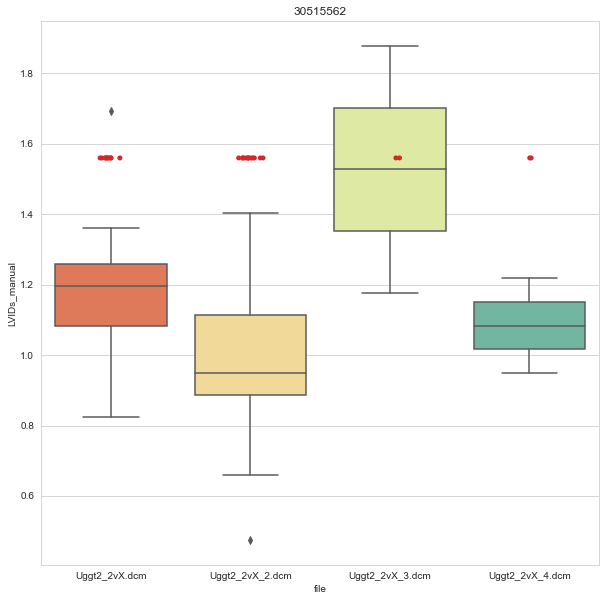

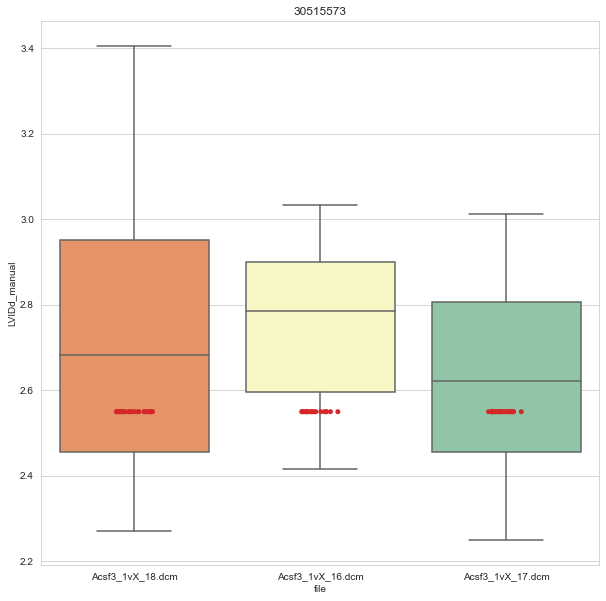

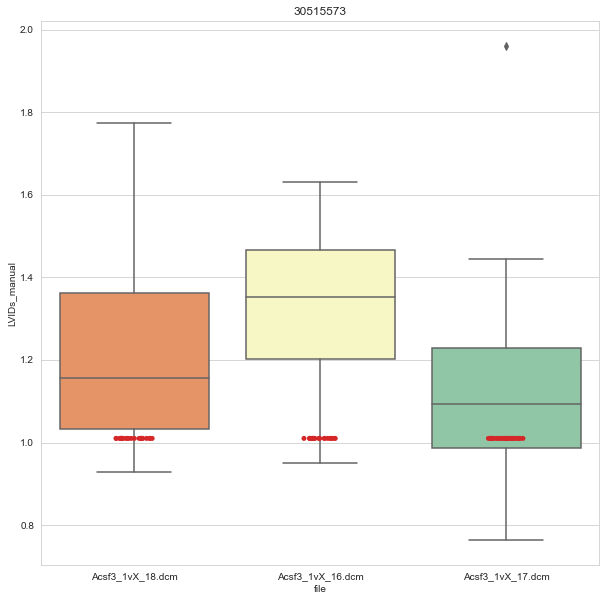

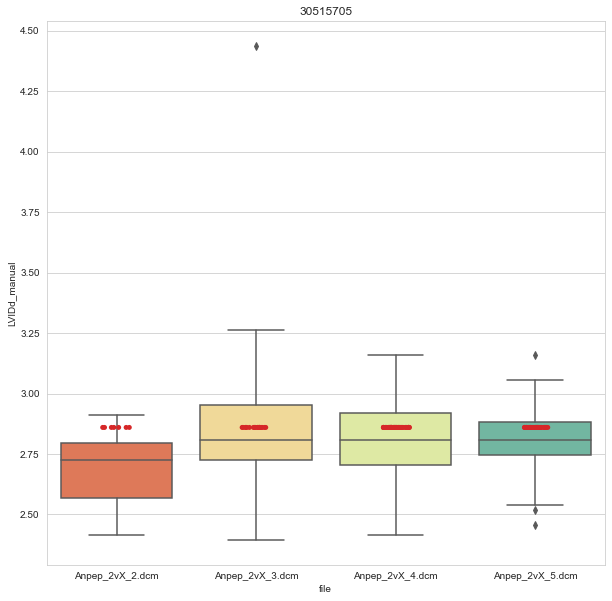

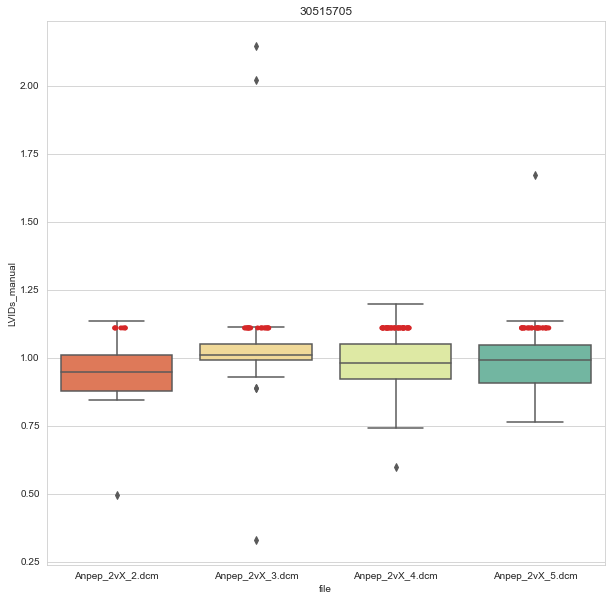

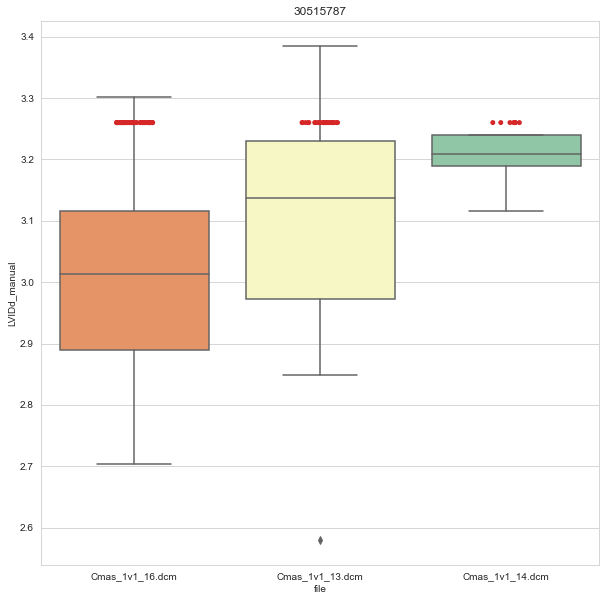

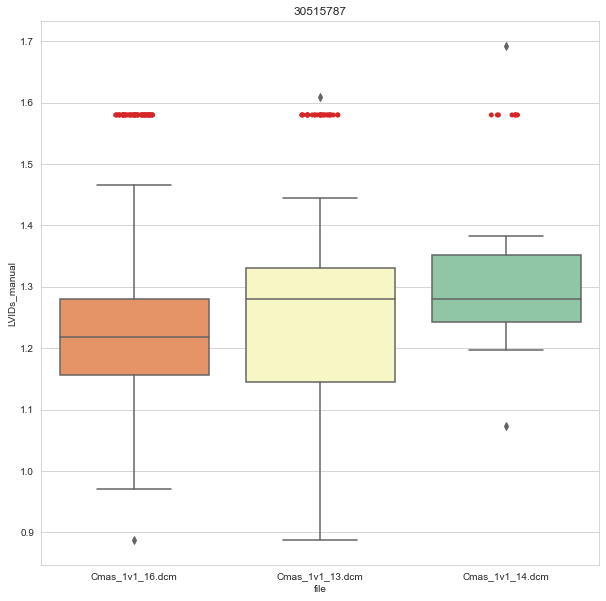

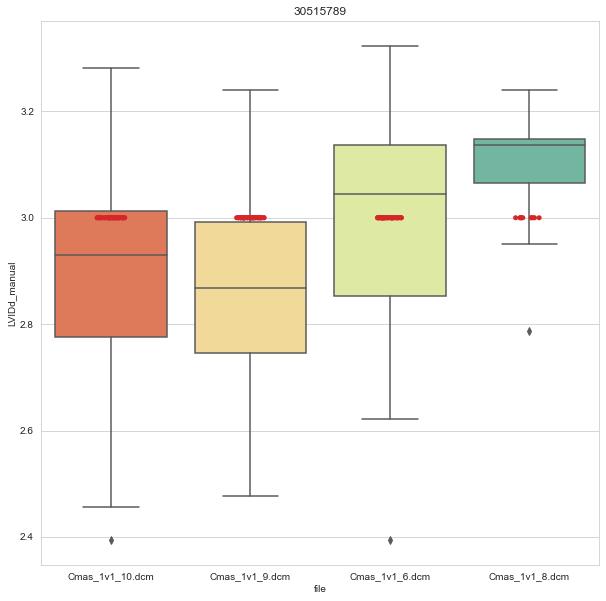

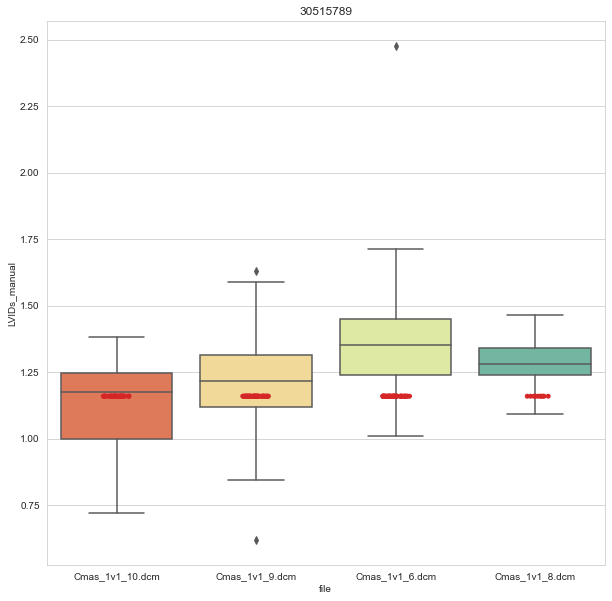

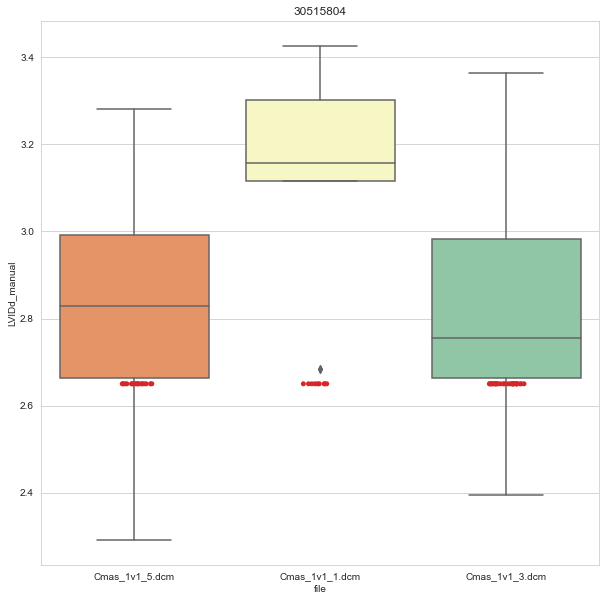

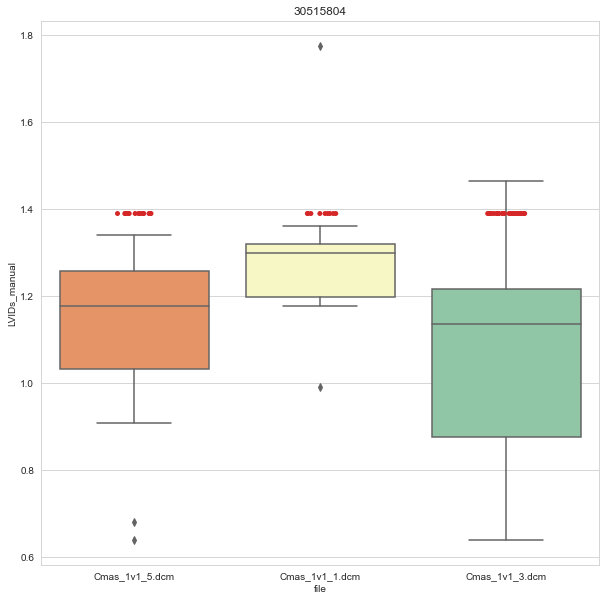

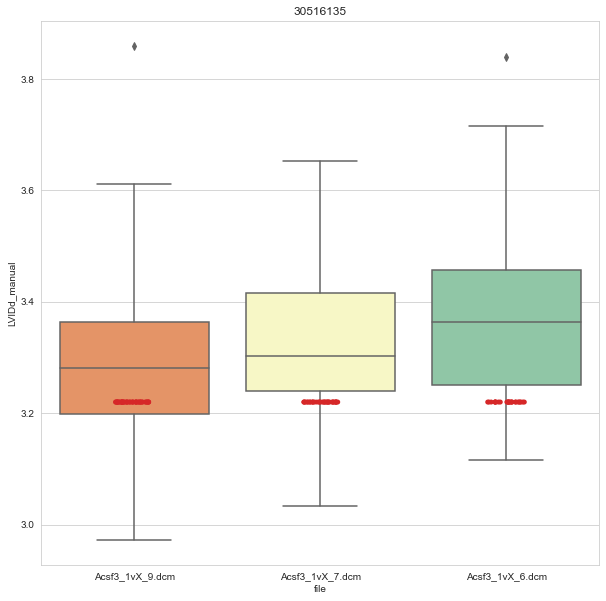

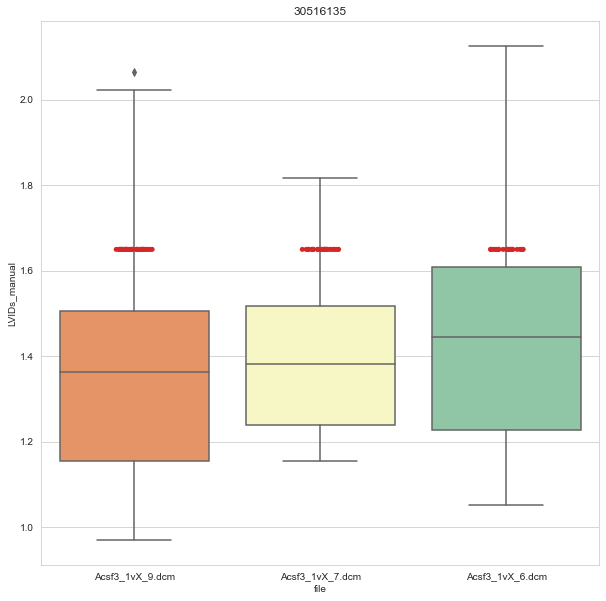

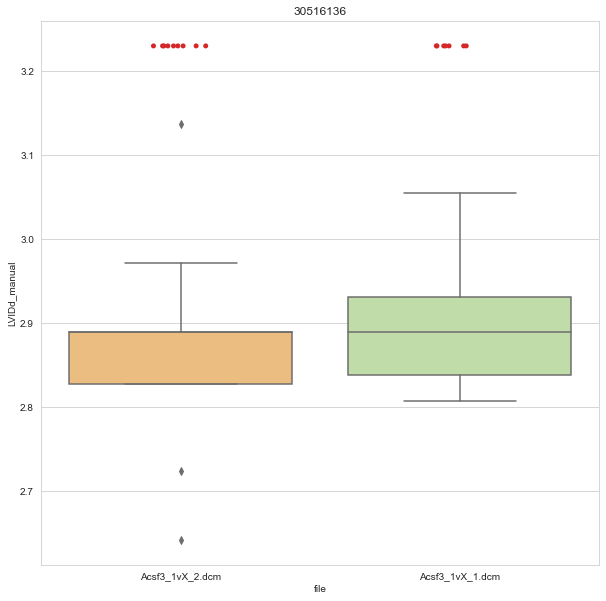

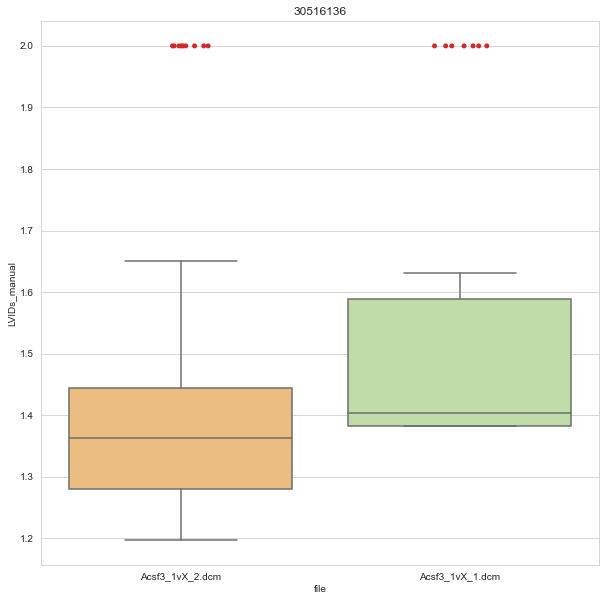

In [9]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [10]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
90,30515573,Acsf3_1vX_16,37.050360,62.949640
91,30515573,Acsf3_1vX_18,58.231968,41.768032
92,30515573,Acsf3_1vX_17,57.649477,42.350523
93,30516135,Acsf3_1vX_9,89.414183,10.585817
94,30516135,Acsf3_1vX_7,73.530923,26.469077
...,...,...,...,...
2155,30515561,Uggt2_2vX_10,14.114423,85.885577
2156,30515562,Uggt2_2vX_2,28.228845,71.771155
2157,30515562,Uggt2_2vX_3,3.529210,96.470790
2158,30515562,Uggt2_2vX,25.886586,74.113414


### Image quality per mouse

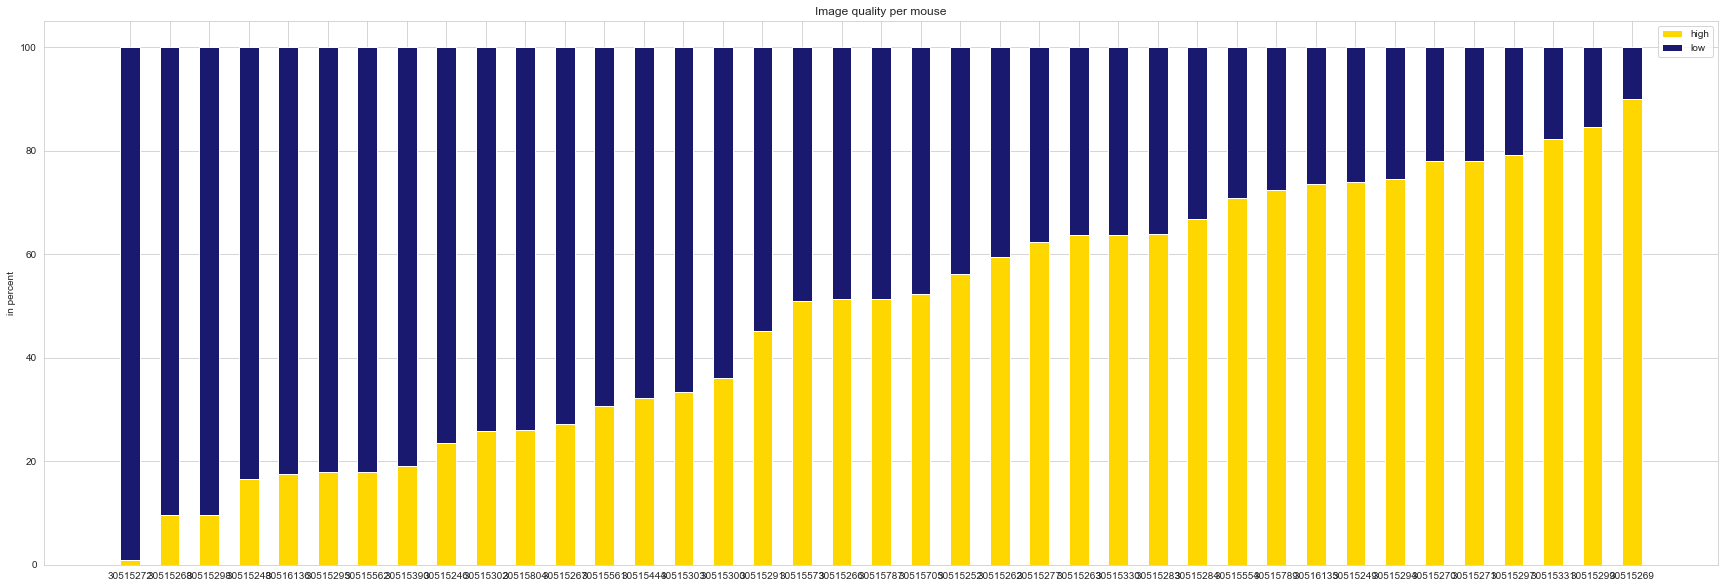

In [11]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [12]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Cmas,48.13,51.87


## Calculation of stats

In [13]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [14]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [15]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [16]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [17]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,3664.00,3664.00,3664.00,3664.00
mean,-0.08,-0.20,3.04,5.19
std,0.31,0.33,8.90,10.23
min,-2.00,-1.48,-77.62,-51.73
25%,-0.24,-0.38,-0.25,-0.52
50%,-0.05,-0.17,3.20,4.94
75%,0.11,-0.02,7.01,11.25
max,2.68,2.38,25.26,39.31
number of mice,39.00,39.00,39.00,39.00


## Calculating p-values with manually annotated data

In [18]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [19]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [20]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [21]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [22]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [25]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [26]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.076,0.273,0.539,0.270
LVIDd,0.212,0.140,1.000,0.967
ejection fraction,0.121,0.678,0.270,0.270
fractional shortening,0.162,0.791,0.236,0.236


In [27]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,10,10,10,10
m,10,10,9,9


In [28]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [29]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [30]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.076,0.273,0.539,0.270
LVIDd,0.212,0.140,1.000,0.967
ejection fraction,0.121,0.678,0.270,0.270
fractional shortening,0.162,0.791,0.236,0.236
